# Data Science Nanodegree Program
****

## Capstone Project
****

**(T.J. Adel) Al-Dajani**

**July 15th, 2022**
****


## I.Project Definition

### Project Overview

**Computer vision is a growing field and it can be used in multible applications to assist humans in various things. In this project I will be building a Convolutional Neural Network (CNN) model to identify wether there is a car or not and if there is a car what side or view is showing.**

**This project can be ustilized at any checkpoint on boarders between countries or at toll centers when entering a highway or any other applications where cars need to be identified.**

### Problem Statement

**I will be building a CNN module from scratch to identify the presence of a car and if it is there fwhat side is showing.
to do so there is some tasks that need to be done listed as follows:**

**1- Collect Data of cars as well as data that has no cars in it (random indoor and outdoor photos).**

**2- Augmenting the data acquired to prevent overfitting and increase the number of photos.**

**3- Building a CNN model and training it.**

**4- Evaluating the model in hand.**

**5- Using the laptops Webcam to test the model in real-life.**

### Metrics

**To measure how good our model was on our collected data we will be checking the following metrics:**

**1- Accuracy: It is simply a ratio of correctly predicted observation to the total observations.**

**2- Precision: Is the ratio of correctly predicted positive observations to the total predicted positive observations.**

**3- Recall: It is the ratio of correctly predicted positive observations to the all observations in actual class.**

**4- F1-Score: It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.**

**And to make everything clear we will cheeck the confusion matrix.**

## II.Analysis

### Data Exploration

**The data collected for this project is divided into two sections, the first one is the car data which was collected from google images, and the second part is images that containes no cars and it consists of indoor and out door data.**

**Of course not all the indoor and out door data was used just enough to have a sort of balance in the data numbers.**

**The indoor data was obtined from kaggle from the MIT Indoor Scenes. Link:https://www.kaggle.com/datasets/itsahmad/indoor-scenes-cvpr-2019**

**The outdoor data was obtained from Kaggle as well from the ade20k-outdoor data. Link: https://www.kaggle.com/datasets/residentmario/ade20k-outdoors**

In [1]:
# Necessary imports
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential, Model
import cv2
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import imgaug
from os import listdir
from skimage.io import imread, imsave
from IPython import display

**The data was splitted as follows: 70% training, 15% validation, 15% testing.**

In [35]:
# importing data
train_dir = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data_no_aug\Train"
datagen = ImageDataGenerator(rescale = 1./255)
train = datagen.flow_from_directory(train_dir, target_size = (224, 224), batch_size = 32, shuffle = True)
test_dir = r'C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data_no_aug\Test'
test = datagen.flow_from_directory(test_dir, target_size = (224, 224), batch_size = 32, shuffle = False)
val_dir = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data_no_aug\Val"
val = datagen.flow_from_directory(val_dir, target_size = (224, 224), batch_size = 32, shuffle = True)

Found 5746 images belonging to 5 classes.
Found 1224 images belonging to 5 classes.
Found 1224 images belonging to 5 classes.


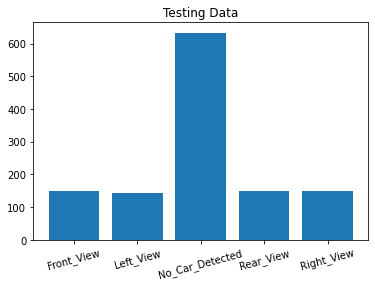

In [36]:
classes = ['Front_View', 'Left_View', 'No_Car_Detected', 'Rear_View', 'Right_View']
h = [len(os.listdir(test_dir + r"\Front_View")), len(os.listdir(test_dir + r"\Left_View")),len(os.listdir(test_dir + r"\No_Car_Detected")),
    len(os.listdir(test_dir + r"\Rear_View")), len(os.listdir(test_dir + r"\Right_View"))]
plt.xticks(rotation = 15);
plt.title('Testing Data');
plt.bar(classes, h);

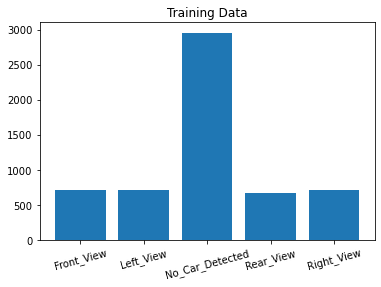

In [37]:
h = [len(os.listdir(train_dir + r"\Front_View")), len(os.listdir(train_dir + r"\Left_View")),len(os.listdir(train_dir + r"\No_Car_Detected")),
    len(os.listdir(train_dir + r"\Rear_View")), len(os.listdir(train_dir + r"\Right_View"))]
plt.xticks(rotation = 15);
plt.title('Training Data');
plt.bar(classes, h);

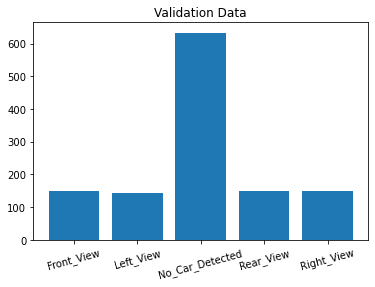

In [38]:
h = [len(os.listdir(val_dir + r"\Front_View")), len(os.listdir(val_dir + r"\Left_View")),len(os.listdir(val_dir + r"\No_Car_Detected")),
    len(os.listdir(val_dir + r"\Rear_View")), len(os.listdir(val_dir + r"\Right_View"))]
plt.xticks(rotation = 15);
plt.title('Validation Data');
plt.bar(classes, h);

**Due to small number of car images and to prevent over fitting data augmentation will be preformed next** 

In [39]:
image_train_front = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Train\Front_View"
image_train_left = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Train\Left_View"
image_train_rear = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Train\Rear_View"
image_train_right = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Train\Right_View"

image_test_front = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Test\Front_View"
image_test_left = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Test\Left_View"
image_test_rear = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Test\Rear_View"
image_test_right = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Test\Right_View"

image_val_front = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Val\Front_View"
image_val_left = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Val\Left_View"
image_val_rear = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Val\Rear_View"
image_val_right = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Val\Right_View"


In [40]:
#augmentations used
seq=iaa.Sequential([

    iaa.Affine(scale=[0.9,1.1],translate_percent=(-0.12,0.12),
             rotate =[-5,5],mode='edge',shear={"x": (-5, 7), "y": (-5, 8)}),
    iaa.MultiplyAndAddToBrightness(mul=(0.7, 1.7), add=(-10, 12)),
    iaa.MultiplySaturation((0.7, 1.4)),
    iaa.MultiplyHue((0.9, 1.1)),
    iaa.LinearContrast((0.5, 1.6)),
    iaa.Sometimes(0.2,iaa.GaussianBlur(sigma=(0.0, 2.5))),
    iaa.Sometimes(0.09,iaa.Snowflakes(flake_size=(0.1, 0.2), speed=(0.01, 0.03))),
    iaa.Sometimes(0.2,iaa.Canny(alpha=(0.0, 0.3))) 
])

In [ ]:
#applying augmnentations to train data and saving it
print('Augmenting Train Front Data')
for images in listdir(image_train_front):
    full_dir = image_train_front +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Train_' + images
        path_to_save = image_train_front + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
         print('Could not Augment image', images)   
    

print('Augmenting Train Left Data')
for images in listdir(image_train_left):
    full_dir = image_train_left +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Train_' + images
        path_to_save = image_train_left + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
        print('Could not Augment image', images)
    
print('Augmenting Train Right Data')
for images in listdir(image_train_right):
    full_dir = image_train_right +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Train_' + images
        path_to_save = image_train_right + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
        print('Could not Augment image', images)
    
print('Augmenting Train Rear Data')
for images in listdir(image_train_rear):
    full_dir = image_train_rear +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Train_' + images
        path_to_save = image_train_rear + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
        print('Could not Augment image', images)

In [ ]:
#applying augmentations to test data and  saving it
print('Augmenting Test Front Data')
for images in listdir(image_test_front):
    full_dir = image_test_front +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Test_' + images
        path_to_save = image_test_front + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
         print('Could not Augment image', images)   
    

print('Augmenting Test Left Data')
for images in listdir(image_test_left):
    full_dir = image_test_left +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Test_' + images
        path_to_save = image_test_left + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
        print('Could not Augment image', images)
    
print('Augmenting Test Right Data')
for images in listdir(image_test_right):
    full_dir = image_test_right +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Test_' + images
        path_to_save = image_test_right + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
        print('Could not Augment image', images)
    
print('Augmenting Test Rear Data')
for images in listdir(image_test_rear):
    full_dir = image_test_rear +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Test_' + images
        path_to_save = image_test_rear + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
        print('Could not Augment image', images)

In [ ]:
#applying augmentations to val data and saving it
print('Augmenting Val Front Data')
for images in listdir(image_val_front):
    full_dir = image_val_front +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Val_' + images
        path_to_save = image_val_front + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
         print('Could not Augment image', images)   
    

print('Augmenting Val Left Data')
for images in listdir(image_val_left):
    full_dir = image_val_left +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Val_' + images
        path_to_save = image_val_left + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
        print('Could not Augment image', images)
    
print('Augmenting Val Right Data')
for images in listdir(image_val_right):
    full_dir = image_val_right +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Val_' + images
        path_to_save = image_val_right + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
        print('Could not Augment image', images)
    
print('Augmenting Val Rear Data')
for images in listdir(image_val_rear):
    full_dir = image_val_rear +'/'+ images
    img = imread(full_dir)
    img = cv2.resize(img, [512, 512])
    try:
        images_aug = seq(image=img)
        name = 'Val_' + images
        path_to_save = image_val_rear + '/'
        cv2.imwrite(path_to_save + name , images_aug)
    except:
        print('Could not Augment image', images)

**We can see that some images could not be augmented due to dimensionality error but since those images are just a few its fine thats why I add the try except code.**

**Now lets take a look at how are data is looking:**

In [29]:
train_dir = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Train"
datagen = ImageDataGenerator(rescale = 1./255)
train = datagen.flow_from_directory(train_dir, target_size = (224, 224), batch_size = 32, shuffle = True)
test_dir = r'C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Test'
test = datagen.flow_from_directory(test_dir, target_size = (224, 224), batch_size = 32, shuffle = False)
val_dir = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Val"
val = datagen.flow_from_directory(val_dir, target_size = (224, 224), batch_size = 32, shuffle = True)

Found 8534 images belonging to 5 classes.
Found 1814 images belonging to 5 classes.
Found 1813 images belonging to 5 classes.


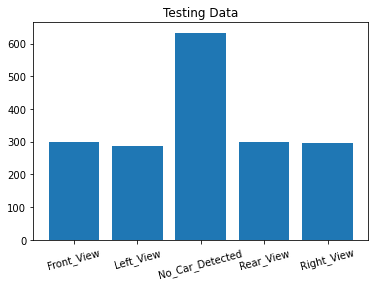

In [30]:
classes = ['Front_View', 'Left_View', 'No_Car_Detected', 'Rear_View', 'Right_View']
h = [len(os.listdir(test_dir + r"\Front_View")), len(os.listdir(test_dir + r"\Left_View")),len(os.listdir(test_dir + r"\No_Car_Detected")),
    len(os.listdir(test_dir + r"\Rear_View")), len(os.listdir(test_dir + r"\Right_View"))]
plt.xticks(rotation = 15);
plt.title('Testing Data');
plt.bar(classes, h);

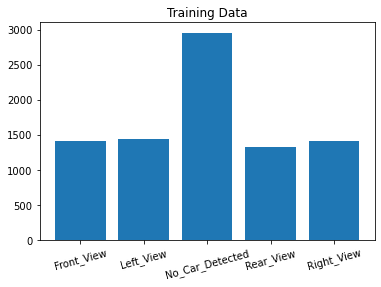

In [31]:
h = [len(os.listdir(train_dir + r"\Front_View")), len(os.listdir(train_dir + r"\Left_View")),len(os.listdir(train_dir + r"\No_Car_Detected")),
    len(os.listdir(train_dir + r"\Rear_View")), len(os.listdir(train_dir + r"\Right_View"))]
plt.xticks(rotation = 15);
plt.title('Training Data');
plt.bar(classes, h);

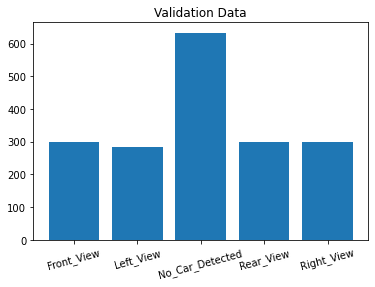

In [32]:
h = [len(os.listdir(val_dir + r"\Front_View")), len(os.listdir(val_dir + r"\Left_View")),len(os.listdir(val_dir + r"\No_Car_Detected")),
    len(os.listdir(val_dir + r"\Rear_View")), len(os.listdir(val_dir + r"\Right_View"))]
plt.xticks(rotation = 15);
plt.title('Validation Data');
plt.bar(classes, h);

**We can see that the car data os almost doubled. I couldn't do any more augmentations because too much of it would harm the model more than benefiting it.**

### Data Visualization

**After we have finished the augmentation let's check out how did the augmentations affect our data.**

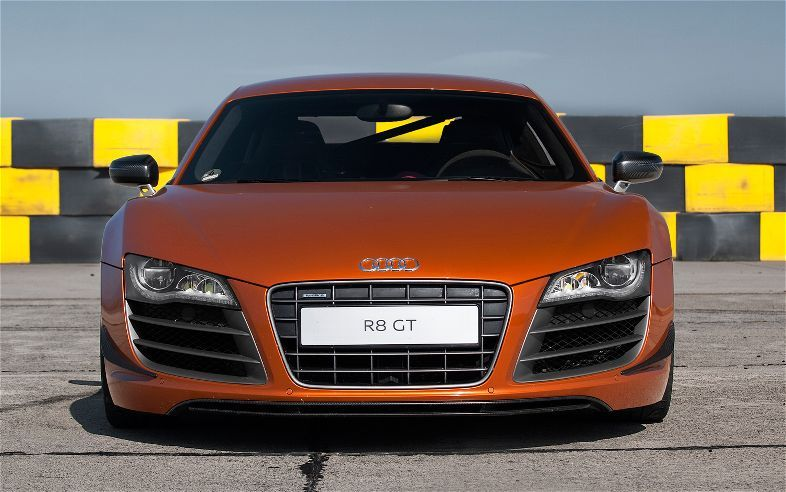

In [33]:
#BEFORE
display.Image(r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Train\Front_View\001182.jpg")

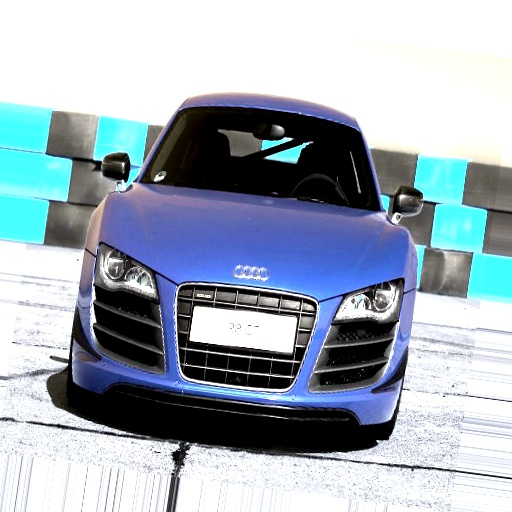

In [34]:
#AFTER
display.Image(r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Train\Front_View\Train_001182.jpg")

**I believe this data would give good results when training the model.**

## III.Methodology

### Data Preprocessing

**For this part as seen previously we have preprocessed the data by resizing it and when we load it we had to rescale it so we would use it in our CNN model.**

In [23]:
train_dir = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Train"
datagen = ImageDataGenerator(rescale = 1./255)
train = datagen.flow_from_directory(train_dir, target_size = (224, 224), batch_size = 32, shuffle = True)
test_dir = r'C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Test'
test = datagen.flow_from_directory(test_dir, target_size = (224, 224), batch_size = 32, shuffle = False)
val_dir = r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Data\Val"
val = datagen.flow_from_directory(val_dir, target_size = (224, 224), batch_size = 32, shuffle = True)

Found 8534 images belonging to 5 classes.
Found 1814 images belonging to 5 classes.
Found 1813 images belonging to 5 classes.


### Implementation
**In this part we will build our model architecture, then we will define some checkpoints such as adaptive learning rate, or early stopping, then we will choose a loss function and a strating learning rate.** 

In [3]:
x_in = Input(shape = (224, 224, 3))
x = Conv2D(16, (1, 1), activation = 'relu', padding = 'same')(x_in)
x = Conv2D(32, (1, 1), activation = 'relu', padding = 'same')(x)
x = Conv2D(16, (1, 1), activation = 'relu', padding = 'same')(x)
x = MaxPool2D((2,2), strides = (2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = MaxPool2D((2,2), strides = (2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = MaxPool2D((2,2), strides = (2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)


x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(256, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = MaxPool2D((2,2), strides = (2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Conv2D(256, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(512, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(256, (3, 3), activation = 'relu', padding = 'same')(x)
x = MaxPool2D((2,2), strides = (2,2))(x)
x = BatchNormalization()(x)


x = Conv2D(512, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(1024, (3, 3), activation = 'relu', padding = 'same')(x)
x = Conv2D(512, (3, 3), activation = 'relu', padding = 'same')(x)
x = MaxPool2D((2,2), strides = (2,2))(x)
x = BatchNormalization()(x)


x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(50, activation = 'relu')(x)
x_out = Dense(5, activation = 'softmax', kernel_regularizer = 'l1_l2', bias_regularizer = 'l1_l2')(x)
model = Model(x_in, x_out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      64        
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      544       
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 16)      528       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 16)     64        
 ormalization)                                               

**We can see that our model has a slightley big number of parameters but this should not be a problem for us.**

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                                 factor=0.3,
                                                 patience=5, 
                                                 min_lr=1e-7,
                                                 min_delta = 0.01)


erl_stp = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', 
                                           min_delta = 0.005,
                                          patience = 12)


chk = tf.keras.callbacks.ModelCheckpoint(filepath = r'C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\CV_model.h5',
                                         monitor = 'val_accuracy',
                                         save_best_only = True)


model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
readings = model.fit(train, batch_size = 32, epochs = 200, validation_data = val, validation_batch_size = 32, callbacks = [reduce_lr, erl_stp, chk])

Epoch 1/200
267/267 [==============================] - 71s 244ms/step - loss: 1.9423 - accuracy: 0.3763 - val_loss: 2.0969 - val_accuracy: 0.3491 - lr: 0.0010
Epoch 2/200
267/267 [==============================] - 58s 219ms/step - loss: 1.2758 - accuracy: 0.5643 - val_loss: 2.0392 - val_accuracy: 0.4054 - lr: 0.0010
Epoch 3/200
267/267 [==============================] - 62s 233ms/step - loss: 0.9259 - accuracy: 0.6697 - val_loss: 0.9134 - val_accuracy: 0.6757 - lr: 0.0010
Epoch 4/200
267/267 [==============================] - 58s 218ms/step - loss: 0.7749 - accuracy: 0.7044 - val_loss: 1.1705 - val_accuracy: 0.5858 - lr: 0.0010
Epoch 5/200
267/267 [==============================] - 58s 218ms/step - loss: 0.6424 - accuracy: 0.7499 - val_loss: 0.6208 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 6/200
267/267 [==============================] - 59s 219ms/step - loss: 0.5240 - accuracy: 0.7995 - val_loss: 0.5554 - val_accuracy: 0.7772 - lr: 0.0010
Epoch 7/200
267/267 [=========================

**In the above cell we can see that we have used the ADAM optimizer with a starting learning rate of 0.001, Then we used the adaptive learning rate to prevent overfitting, with an early stopping callback as well to save resources when it is clearly that the model will not learn any better.**

**for the loss function I have used the categorical_crossentropy since it is used when there is a multi-class classification.**

### Refinement

**For this section I have only changed the architecture of the model a couple of times to get the best results possible.**

## IV.Results
### Model Evaluation and Validation

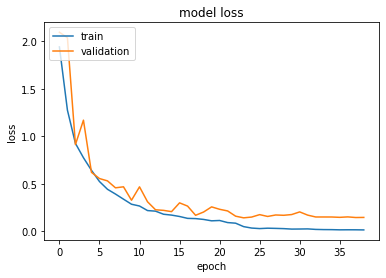

In [5]:
plt.plot(readings.history['loss'])
plt.plot(readings.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

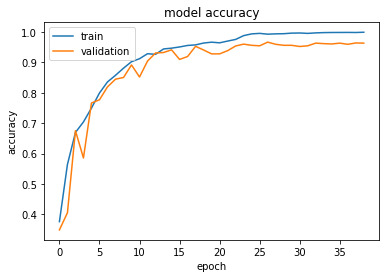

In [6]:
plt.plot(readings.history['accuracy'])
plt.plot(readings.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
print("Evaluate on test data")
results = model.evaluate(test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
57/57 [==============================] - 8s 138ms/step - loss: 0.3454 - accuracy: 0.9085
test loss, test acc: [0.3453749418258667, 0.9084895253181458]


**The model scored a 91% accuracy on the test data which it never saw or trained on this shows that our model is doing a very good job. Lets check out the ither metrics listed in the metrics section above:**

In [25]:
print("Generating predictions")
predictions = model.predict(test)
print("predictions shape:", predictions.shape)

Generating predictions
57/57 [==============================] - 8s 140ms/step
predictions shape: (1814, 5)


In [26]:
confusion_matrix(test.classes, np.argmax(predictions, axis = 1))

array([[258,   2,  19,  19,   0],
       [  2, 269,   5,   1,   9],
       [  0,   0, 622,  10,   1],
       [ 33,   3,  13, 248,   3],
       [  3,  32,  11,   0, 251]], dtype=int64)

In [27]:
print(classification_report(test.classes, np.argmax(predictions, axis = 1)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       298
           1       0.88      0.94      0.91       286
           2       0.93      0.98      0.95       633
           3       0.89      0.83      0.86       300
           4       0.95      0.85      0.89       297

    accuracy                           0.91      1814
   macro avg       0.90      0.89      0.90      1814
weighted avg       0.91      0.91      0.91      1814



### Justification

**From the above tests and results we can find the following:**

**1- Our model reached a 99% percent on the training data and 96% on the validation data.**

**2- From the accuracy and loss plots we can see that theres is a slight over fitting in the model. Ths could be due to the model architecture or that we did too much augmentations.**

**3- When evaluating the model on the test data it scored a very good 91% accuracy with 0.34 loss.**

**4- After finding the confusion matrix it is clear that the model have a slight difficulty deciding that the rear view is actualy rear, it mixes it up with the front view. this problem could be solved by providing more data.**

**5- printing the classification report gives us the precision, recall, and f1-score metrics. this report shows us that our model again did good.**

## V.Real-life test

**In this extra section we will use our webcam to make predictions on car images.**

**This section was added to further test and be 100% sure of our model performance.**

#### Note: to run the web cam correctly first run the Webcam correctly first run the model architecture cell then the one after it then the cell below.

In [28]:
#Load the model with the best results
model.load_weights(r'C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\CV_model.h5')
classes = ['Front view', 'Left view','NO Car Detected', 'Rear view', 'Right view']
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read() #read frame one by one
     #display frame
    #pic = cv2.imshow("Frame", frame)
    
    
    
    frame2 = frame
    frame2 = cv2.resize(frame2, (224, 224))
    frame2 = frame2 * 1/255
    show = np.array(frame2)
    show = np.expand_dims(show, axis=0)
    
    
    y_pred = model.predict(show);
    idx = np.argmax(y_pred[0])
    print(y_pred[0])
    #choose a threshold to display results
    if y_pred[0][idx] > 0.8:

        # If score is less than 0.2 we avoid making a prediction.
        #if y_list[i] < 0.2: 
            #continue
        bgr = (0, 0, 255) # color of the box
        # Get the name of label index
        label_font = cv2.FONT_HERSHEY_SIMPLEX #Font for the label.
        cv2.putText(frame,\
                    (classes[np.argmax(y_pred[0])]+str(y_pred[0][idx])), \
                    (50, 50), \
                    label_font, 0.9, bgr, 2) #Put a label over box.
    # here we should apply the machine learning model since here is where 
    #each frame is capture
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) #wait till key press
    if key == ord("q"): #exit loop on 'q' key press
        break
cap.release() #release video capture object
cv2.destroyAllWindows() #destroy all frame windows

1/1 [==============================] - 1s 787ms/step
[0.0069924  0.00434383 0.03339976 0.9523027  0.00296129]
1/1 [==============================] - 0s 17ms/step
[1.8660910e-05 5.4157219e-05 9.9945039e-01 4.5908950e-04 1.7710105e-05]
1/1 [==============================] - 0s 17ms/step
[1.9730734e-05 5.0975530e-05 9.9942505e-01 4.8631566e-04 1.7941051e-05]
1/1 [==============================] - 0s 17ms/step
[1.9730734e-05 5.0975530e-05 9.9942505e-01 4.8631566e-04 1.7941051e-05]
1/1 [==============================] - 0s 16ms/step
[1.9730734e-05 5.0975530e-05 9.9942505e-01 4.8631566e-04 1.7941051e-05]
1/1 [==============================] - 0s 15ms/step
[2.4659665e-05 7.0677648e-05 9.9917197e-01 7.1013637e-04 2.2655693e-05]
1/1 [==============================] - 0s 16ms/step
[2.4528619e-05 6.3479674e-05 9.9924040e-01 6.4981822e-04 2.1815811e-05]
1/1 [==============================] - 0s 16ms/step
[2.9052977e-05 7.2639821e-05 9.9896920e-01 9.0339326e-04 2.5711714e-05]
1/1 [=================

1/1 [==============================] - 0s 15ms/step
[2.6343601e-05 6.7909263e-05 9.9919218e-01 6.8578665e-04 2.7860766e-05]
1/1 [==============================] - 0s 15ms/step
[2.3293163e-05 6.0833339e-05 9.9931753e-01 5.7329028e-04 2.5176238e-05]
1/1 [==============================] - 0s 15ms/step
[2.3293163e-05 6.0833339e-05 9.9931753e-01 5.7329028e-04 2.5176238e-05]
1/1 [==============================] - 0s 16ms/step
[2.6100470e-05 6.4844819e-05 9.9927562e-01 6.0721044e-04 2.6338892e-05]
1/1 [==============================] - 0s 15ms/step
[2.8457638e-05 7.3873925e-05 9.9904245e-01 8.2487217e-04 3.0381616e-05]
1/1 [==============================] - 0s 15ms/step
[2.5888374e-05 6.4287524e-05 9.9925393e-01 6.2972889e-04 2.6184247e-05]
1/1 [==============================] - 0s 14ms/step
[2.5888374e-05 6.4287524e-05 9.9925393e-01 6.2972889e-04 2.6184247e-05]
1/1 [==============================] - 0s 13ms/step
[2.7358363e-05 7.6007629e-05 9.9909496e-01 7.7160972e-04 2.9992032e-05]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[3.3677796e-05 8.1817423e-05 9.9852282e-01 1.3260144e-03 3.5658708e-05]
1/1 [==============================] - 0s 16ms/step
[2.9703608e-05 7.5824420e-05 9.9863619e-01 1.2260992e-03 3.2246313e-05]
1/1 [==============================] - 0s 14ms/step
[2.9703608e-05 7.5824420e-05 9.9863619e-01 1.2260992e-03 3.2246313e-05]
1/1 [==============================] - 0s 16ms/step
[3.2689761e-05 7.8982914e-05 9.9865675e-01 1.1972268e-03 3.4338580e-05]
1/1 [==============================] - 0s 16ms/step
[3.3571112e-05 7.6247314e-05 9.9860758e-01 1.2489232e-03 3.3717708e-05]
1/1 [==============================] - 0s 15ms/step
[3.4921402e-05 7.3768533e-05 9.9869674e-01 1.1614470e-03 3.3128224e-05]
1/1 [==============================] - 0s 15ms/step
[3.5408480e-05 7.7182805e-05 9.9851125e-01 1.3410149e-03 3.5135279e-05]
1/1 [==============================] - 0s 17ms/step
[3.8607985e-05 7.7594406e-05 9.9868172e-01 1.1667357e-03 3.5413679e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[3.7261663e-05 1.2807605e-04 9.9743360e-01 2.3528903e-03 4.8106587e-05]
1/1 [==============================] - 0s 15ms/step
[3.9684797e-05 1.3840503e-04 9.9701095e-01 2.7596431e-03 5.1290994e-05]
1/1 [==============================] - 0s 15ms/step
[4.7883299e-05 1.6858296e-04 9.9634761e-01 3.3757889e-03 6.0126964e-05]
1/1 [==============================] - 0s 16ms/step
[4.7883299e-05 1.6858296e-04 9.9634761e-01 3.3757889e-03 6.0126964e-05]
1/1 [==============================] - 0s 15ms/step
[4.4724351e-05 1.3240169e-04 9.9735248e-01 2.4196554e-03 5.0756909e-05]
1/1 [==============================] - 0s 15ms/step
[4.1961201e-05 1.3319252e-04 9.9694318e-01 2.8309436e-03 5.0794220e-05]
1/1 [==============================] - 0s 14ms/step
[5.0208291e-05 1.7632340e-04 9.9560058e-01 4.1088443e-03 6.3958607e-05]
1/1 [==============================] - 0s 14ms/step
[3.8993614e-05 1.5311832e-04 9.9667180e-01 3.0823876e-03 5.3748718e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[6.2644394e-05 2.1498973e-04 9.9537045e-01 4.2816433e-03 7.0261034e-05]
1/1 [==============================] - 0s 14ms/step
[5.4280437e-05 1.4733958e-04 9.9681085e-01 2.9348359e-03 5.2635398e-05]
1/1 [==============================] - 0s 15ms/step
[4.3919998e-05 1.2999347e-04 9.9726319e-01 2.5141982e-03 4.8610094e-05]
1/1 [==============================] - 0s 15ms/step
[4.3919998e-05 1.2999347e-04 9.9726319e-01 2.5141982e-03 4.8610094e-05]
1/1 [==============================] - 0s 15ms/step
[5.2200921e-05 1.4407282e-04 9.9682391e-01 2.9267534e-03 5.2958432e-05]
1/1 [==============================] - 0s 13ms/step
[5.6838042e-05 1.7268978e-04 9.9574429e-01 3.9673219e-03 5.8798345e-05]
1/1 [==============================] - 0s 15ms/step
[6.7989233e-05 2.1380289e-04 9.9474454e-01 4.9035563e-03 7.0192080e-05]
1/1 [==============================] - 0s 13ms/step
[7.1074741e-05 2.3045708e-04 9.9392587e-01 5.6980774e-03 7.4568925e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[6.9549504e-05 2.6290872e-04 9.9215573e-01 7.4268072e-03 8.5071086e-05]
1/1 [==============================] - 0s 16ms/step
[5.7351415e-05 1.5774717e-04 9.9729186e-01 2.4360069e-03 5.7060955e-05]
1/1 [==============================] - 0s 14ms/step
[3.7857531e-05 9.9723038e-05 9.9879056e-01 1.0334051e-03 3.8456266e-05]
1/1 [==============================] - 0s 14ms/step
[3.5828907e-05 9.2648428e-05 9.9874276e-01 1.0920106e-03 3.6817906e-05]
1/1 [==============================] - 0s 16ms/step
[4.3312131e-05 8.4155072e-05 9.9895561e-01 8.8305236e-04 3.3989887e-05]
1/1 [==============================] - 0s 16ms/step
[3.6248450e-05 6.1553059e-05 9.9928206e-01 5.9366546e-04 2.6476491e-05]
1/1 [==============================] - 0s 15ms/step
[2.6732947e-05 5.4869710e-05 9.9936479e-01 5.3087884e-04 2.2787555e-05]
1/1 [==============================] - 0s 15ms/step
[5.1317958e-05 9.1433307e-05 9.9850416e-01 1.3150591e-03 3.8108203e-05]
1/1 [===

1/1 [==============================] - 0s 17ms/step
[5.9525257e-05 1.5220948e-04 9.9635398e-01 3.3707453e-03 6.3557185e-05]
1/1 [==============================] - 0s 15ms/step
[8.4937667e-05 3.0300958e-04 9.9141908e-01 8.0898860e-03 1.0308201e-04]
1/1 [==============================] - 0s 15ms/step
[7.4264659e-05 2.6602199e-04 9.9278212e-01 6.7878054e-03 8.9816378e-05]
1/1 [==============================] - 0s 18ms/step
[7.4264659e-05 2.6602199e-04 9.9278212e-01 6.7878054e-03 8.9816378e-05]
1/1 [==============================] - 0s 17ms/step
[6.8171692e-05 2.2434602e-04 9.9462140e-01 5.0080549e-03 7.8027559e-05]
1/1 [==============================] - 0s 15ms/step
[6.8171692e-05 2.2434602e-04 9.9462140e-01 5.0080549e-03 7.8027559e-05]
1/1 [==============================] - 0s 15ms/step
[5.3467742e-05 1.9131634e-04 9.9615967e-01 3.5313154e-03 6.4296473e-05]
1/1 [==============================] - 0s 15ms/step
[6.2623207e-05 2.2745528e-04 9.9448544e-01 5.1463265e-03 7.8079633e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[6.7865694e-05 1.4758627e-04 9.9731773e-01 2.4025054e-03 6.4369073e-05]
1/1 [==============================] - 0s 16ms/step
[5.8911814e-05 9.5262963e-05 9.9859208e-01 1.2079151e-03 4.5822762e-05]
1/1 [==============================] - 0s 15ms/step
[5.6514804e-05 8.7966662e-05 9.9871230e-01 1.0992066e-03 4.3960041e-05]
1/1 [==============================] - 0s 14ms/step
[6.0471837e-05 9.6926582e-05 9.9863464e-01 1.1617903e-03 4.6228452e-05]
1/1 [==============================] - 0s 15ms/step
[6.0471837e-05 9.6926582e-05 9.9863464e-01 1.1617903e-03 4.6228452e-05]
1/1 [==============================] - 0s 15ms/step
[6.1659193e-05 9.3198818e-05 9.9875867e-01 1.0416041e-03 4.4849214e-05]
1/1 [==============================] - 0s 17ms/step
[6.1867082e-05 9.4121628e-05 9.9863142e-01 1.1664238e-03 4.6135636e-05]
1/1 [==============================] - 0s 17ms/step
[5.4687083e-05 8.9955829e-05 9.9882752e-01 9.8467793e-04 4.3101638e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[1.0537822e-04 2.7681608e-04 9.8572010e-01 1.3788067e-02 1.0962878e-04]
1/1 [==============================] - 0s 15ms/step
[1.21333374e-04 3.43420572e-04 9.79459226e-01 1.99426059e-02
 1.33434005e-04]
1/1 [==============================] - 0s 15ms/step
[1.3974491e-04 3.2872439e-04 9.8002666e-01 1.9373095e-02 1.3183473e-04]
1/1 [==============================] - 0s 19ms/step
[8.0024271e-05 1.7366423e-04 9.9627930e-01 3.3996908e-03 6.7321867e-05]
1/1 [==============================] - 0s 16ms/step
[5.3888980e-05 1.2279629e-04 9.9784911e-01 1.9262707e-03 4.7981855e-05]
1/1 [==============================] - 0s 15ms/step
[7.3779971e-05 1.8559235e-04 9.9572539e-01 3.9440989e-03 7.1129318e-05]
1/1 [==============================] - 0s 15ms/step
[5.7449164e-05 1.5091388e-04 9.9724787e-01 2.4876713e-03 5.6049201e-05]
1/1 [==============================] - 0s 16ms/step
[5.7449164e-05 1.5091388e-04 9.9724787e-01 2.4876713e-03 5.6049201e-05]
1/

1/1 [==============================] - 0s 15ms/step
[8.3775521e-05 1.6590796e-04 9.9326915e-01 6.4067245e-03 7.4312717e-05]
1/1 [==============================] - 0s 15ms/step
[1.1032968e-04 2.0330353e-04 9.8976934e-01 9.8240077e-03 9.2928894e-05]
1/1 [==============================] - 0s 15ms/step
[1.14718234e-04 2.21857321e-04 9.88247812e-01 1.13140224e-02
 1.01527883e-04]
1/1 [==============================] - 0s 15ms/step
[9.3115792e-05 1.7505429e-04 9.9254733e-01 7.1026757e-03 8.1897379e-05]
1/1 [==============================] - 0s 16ms/step
[8.6170854e-05 1.6530033e-04 9.9339759e-01 6.2773218e-03 7.3482079e-05]
1/1 [==============================] - 0s 16ms/step
[1.02991995e-04 1.79265437e-04 9.91724432e-01 7.91058503e-03
 8.26583564e-05]
1/1 [==============================] - 0s 15ms/step
[9.1557697e-05 1.7957011e-04 9.9116993e-01 8.4766271e-03 8.2192179e-05]
1/1 [==============================] - 0s 15ms/step
[9.1557697e-05 1.7957011e-04 9.9116993e-01 8.4766271e-03 8.2192179e-

1/1 [==============================] - 0s 16ms/step
[3.1891977e-05 5.1937968e-05 9.9958521e-01 3.1503162e-04 1.5794947e-05]
1/1 [==============================] - 0s 15ms/step
[3.9234958e-05 6.5529974e-05 9.9939013e-01 4.8515038e-04 2.0067158e-05]
1/1 [==============================] - 0s 14ms/step
[3.6056423e-05 7.8887300e-05 9.9918717e-01 6.7335519e-04 2.4512536e-05]
1/1 [==============================] - 0s 15ms/step
[2.7889459e-05 5.0022762e-05 9.9938118e-01 5.2294403e-04 1.7951099e-05]
1/1 [==============================] - 0s 14ms/step
[2.7889459e-05 5.0022762e-05 9.9938118e-01 5.2294403e-04 1.7951099e-05]
1/1 [==============================] - 0s 15ms/step
[3.0484644e-05 4.5425022e-05 9.9937588e-01 5.3041609e-04 1.7813190e-05]
1/1 [==============================] - 0s 14ms/step
[3.3912405e-05 4.7292917e-05 9.9911278e-01 7.8591920e-04 1.9952149e-05]
1/1 [==============================] - 0s 14ms/step
[3.3912405e-05 4.7292917e-05 9.9911278e-01 7.8591920e-04 1.9952149e-05]
1/1 [===

1/1 [==============================] - 0s 16ms/step
[7.9845086e-05 1.3311734e-04 9.9792850e-01 1.8137284e-03 4.4871849e-05]
1/1 [==============================] - 0s 14ms/step
[7.15835413e-05 1.07986954e-04 9.98349547e-01 1.43274176e-03
 3.80675447e-05]
1/1 [==============================] - 0s 15ms/step
[6.2268133e-05 9.6445263e-05 9.9840516e-01 1.4013065e-03 3.4792087e-05]
1/1 [==============================] - 0s 15ms/step
[5.3254273e-05 7.8383360e-05 9.9886441e-01 9.7459479e-04 2.9303472e-05]
1/1 [==============================] - 0s 15ms/step
[5.7412035e-05 9.4007548e-05 9.9873930e-01 1.0760165e-03 3.3235363e-05]
1/1 [==============================] - 0s 16ms/step
[5.4281471e-05 9.3366958e-05 9.9861670e-01 1.2022989e-03 3.3386652e-05]
1/1 [==============================] - 0s 15ms/step
[4.0529943e-05 7.0624497e-05 9.9895394e-01 9.0902980e-04 2.5973866e-05]
1/1 [==============================] - 0s 14ms/step
[4.4200777e-05 7.1718743e-05 9.9868912e-01 1.1668239e-03 2.8064953e-05]
1/

1/1 [==============================] - 0s 15ms/step
[6.9761845e-05 1.8652529e-04 9.9280179e-01 6.8718423e-03 7.0191083e-05]
1/1 [==============================] - 0s 15ms/step
[6.9761845e-05 1.8652529e-04 9.9280179e-01 6.8718423e-03 7.0191083e-05]
1/1 [==============================] - 0s 15ms/step
[8.3947802e-05 2.0168090e-04 9.9190724e-01 7.7302023e-03 7.6802964e-05]
1/1 [==============================] - 0s 15ms/step
[5.8276455e-05 1.4514204e-04 9.9550724e-01 4.2321826e-03 5.7151468e-05]
1/1 [==============================] - 0s 15ms/step
[8.8547269e-05 2.0995879e-04 9.9222177e-01 7.4010589e-03 7.8639772e-05]
1/1 [==============================] - 0s 15ms/step
[8.1434038e-05 1.9568759e-04 9.9269205e-01 6.9570048e-03 7.3835210e-05]
1/1 [==============================] - 0s 15ms/step
[6.7999252e-05 1.8486494e-04 9.9362904e-01 6.0494817e-03 6.8545523e-05]
1/1 [==============================] - 0s 15ms/step
[5.1978717e-05 1.3040086e-04 9.9613118e-01 3.6375145e-03 4.8971215e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[7.2761490e-05 2.1191881e-04 9.8571056e-01 1.3922591e-02 8.2119441e-05]
1/1 [==============================] - 0s 15ms/step
[6.6869674e-05 2.0171724e-04 9.8744744e-01 1.2205797e-02 7.8174548e-05]
1/1 [==============================] - 0s 15ms/step
[5.3627060e-05 1.6395237e-04 9.9004608e-01 9.6709644e-03 6.5314285e-05]
1/1 [==============================] - 0s 15ms/step
[3.9615050e-05 1.2942165e-04 9.9400854e-01 5.7705315e-03 5.1804236e-05]
1/1 [==============================] - 0s 14ms/step
[3.9615050e-05 1.2942165e-04 9.9400854e-01 5.7705315e-03 5.1804236e-05]
1/1 [==============================] - 0s 15ms/step
[6.4888787e-05 1.9369647e-04 9.8792833e-01 1.1736728e-02 7.6304343e-05]
1/1 [==============================] - 0s 15ms/step
[4.2665579e-05 1.3780776e-04 9.9333173e-01 6.4337947e-03 5.4020053e-05]
1/1 [==============================] - 0s 15ms/step
[5.1445630e-05 1.6063280e-04 9.9060273e-01 9.1213696e-03 6.3873937e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[1.8200505e-04 2.5207957e-04 9.8601472e-01 1.3426204e-02 1.2495957e-04]
1/1 [==============================] - 0s 15ms/step
[1.8200505e-04 2.5207957e-04 9.8601472e-01 1.3426204e-02 1.2495957e-04]
1/1 [==============================] - 0s 15ms/step
[1.5627530e-04 2.1867218e-04 9.8818356e-01 1.1330281e-02 1.1116326e-04]
1/1 [==============================] - 0s 16ms/step
[1.50603926e-04 2.22561430e-04 9.90288973e-01 9.23099555e-03
 1.06809865e-04]
1/1 [==============================] - 0s 16ms/step
[1.4472568e-04 2.1546465e-04 9.9005157e-01 9.4818342e-03 1.0638124e-04]
1/1 [==============================] - 0s 15ms/step
[1.4472568e-04 2.1546465e-04 9.9005157e-01 9.4818342e-03 1.0638124e-04]
1/1 [==============================] - 0s 15ms/step
[1.13681745e-04 1.84225108e-04 9.91686046e-01 7.92643521e-03
 8.96619604e-05]
1/1 [==============================] - 0s 15ms/step
[1.02626655e-04 1.65577570e-04 9.93245304e-01 6.40586810e-03
 8.0680

1/1 [==============================] - 0s 15ms/step
[3.0695977e-05 6.3687301e-05 9.9886900e-01 1.0073375e-03 2.9218827e-05]
1/1 [==============================] - 0s 15ms/step
[6.3887055e-05 1.1693280e-04 9.9727434e-01 2.4961228e-03 4.8698610e-05]
1/1 [==============================] - 0s 14ms/step
[6.3887055e-05 1.1693280e-04 9.9727434e-01 2.4961228e-03 4.8698610e-05]
1/1 [==============================] - 0s 14ms/step
[2.6842627e-05 5.7346460e-05 9.9904770e-01 8.4206584e-04 2.6057338e-05]
1/1 [==============================] - 0s 14ms/step
[5.3804200e-05 9.7832766e-05 9.9827266e-01 1.5330747e-03 4.2592103e-05]
1/1 [==============================] - 0s 16ms/step
[8.7639935e-05 1.4509143e-04 9.9580485e-01 3.8972592e-03 6.5218519e-05]
1/1 [==============================] - 0s 15ms/step
[8.7639935e-05 1.4509143e-04 9.9580485e-01 3.8972592e-03 6.5218519e-05]
1/1 [==============================] - 0s 13ms/step
[9.3461582e-05 2.0322259e-04 9.8472059e-01 1.4890938e-02 9.1889044e-05]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[9.8313743e-05 1.5624665e-04 9.9350911e-01 6.1661354e-03 7.0191476e-05]
1/1 [==============================] - 0s 15ms/step
[8.9209076e-05 1.4025379e-04 9.9445069e-01 5.2544638e-03 6.5337743e-05]
1/1 [==============================] - 0s 15ms/step
[1.0825197e-04 1.6038552e-04 9.9183875e-01 7.8169210e-03 7.5641277e-05]
1/1 [==============================] - 0s 16ms/step
[1.1012414e-04 1.6516370e-04 9.9196893e-01 7.6783933e-03 7.7305092e-05]
1/1 [==============================] - 0s 15ms/step
[7.33823472e-05 1.11126814e-04 9.95721221e-01 4.04026592e-03
 5.40439796e-05]
1/1 [==============================] - 0s 15ms/step
[7.0948096e-05 1.1656305e-04 9.9569976e-01 4.0560188e-03 5.6794805e-05]
1/1 [==============================] - 0s 15ms/step
[6.85283303e-05 1.06987834e-04 9.96008396e-01 3.76487128e-03
 5.12063452e-05]
1/1 [==============================] - 0s 15ms/step
[9.7575728e-05 1.4919542e-04 9.9314630e-01 6.5372880e-03 6.9776135e-

1/1 [==============================] - 0s 15ms/step
[1.0947909e-04 1.8162305e-04 9.9321270e-01 6.4110789e-03 8.4992142e-05]
1/1 [==============================] - 0s 16ms/step
[1.7288628e-04 2.4932096e-04 9.8570049e-01 1.3757288e-02 1.1997191e-04]
1/1 [==============================] - 0s 15ms/step
[1.3986893e-04 2.1801936e-04 9.8852277e-01 1.1011894e-02 1.0749209e-04]
1/1 [==============================] - 0s 14ms/step
[1.3986893e-04 2.1801936e-04 9.8852277e-01 1.1011894e-02 1.0749209e-04]
1/1 [==============================] - 0s 15ms/step
[1.3274966e-04 1.9316821e-04 9.9112785e-01 8.4521119e-03 9.4176437e-05]
1/1 [==============================] - 0s 15ms/step
[1.17187024e-04 1.79102775e-04 9.92417932e-01 7.19850836e-03
 8.72964665e-05]
1/1 [==============================] - 0s 16ms/step
[1.07459346e-04 1.72080050e-04 9.92151022e-01 7.48421112e-03
 8.52649682e-05]
1/1 [==============================] - 0s 15ms/step
[1.3101462e-04 2.0202402e-04 9.9009120e-01 9.4763152e-03 9.9432647e-

1/1 [==============================] - 0s 14ms/step
[1.7484010e-04 2.3991776e-04 9.8215884e-01 1.7305275e-02 1.2116261e-04]
1/1 [==============================] - 0s 15ms/step
[2.3694574e-04 3.0515093e-04 9.7423631e-01 2.5065081e-02 1.5645930e-04]
1/1 [==============================] - 0s 15ms/step
[3.0296089e-04 3.7498117e-04 9.6450204e-01 3.4633525e-02 1.8643797e-04]
1/1 [==============================] - 0s 15ms/step
[2.5434527e-04 3.3618783e-04 9.6970415e-01 2.9542647e-02 1.6258826e-04]
1/1 [==============================] - 0s 16ms/step
[2.5434527e-04 3.3618783e-04 9.6970415e-01 2.9542647e-02 1.6258826e-04]
1/1 [==============================] - 0s 15ms/step
[2.5070258e-04 3.2940722e-04 9.7259933e-01 2.6658397e-02 1.6219939e-04]
1/1 [==============================] - 0s 14ms/step
[2.8130968e-04 3.6622529e-04 9.6184987e-01 3.7317842e-02 1.8480174e-04]
1/1 [==============================] - 0s 15ms/step
[2.7217960e-04 3.6681068e-04 9.6174002e-01 3.7436444e-02 1.8457316e-04]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[8.2086903e-05 9.6326279e-05 9.9895144e-01 8.3318894e-04 3.6965081e-05]
1/1 [==============================] - 0s 15ms/step
[5.7623463e-05 6.2315441e-05 9.9923038e-01 6.2436471e-04 2.5305153e-05]
1/1 [==============================] - 0s 14ms/step
[4.8234513e-05 4.8669179e-05 9.9929178e-01 5.8971957e-04 2.1706048e-05]
1/1 [==============================] - 0s 14ms/step
[4.8234513e-05 4.8669179e-05 9.9929178e-01 5.8971957e-04 2.1706048e-05]
1/1 [==============================] - 0s 14ms/step
[3.3936783e-05 3.0781848e-05 9.9955732e-01 3.6324214e-04 1.4736847e-05]
1/1 [==============================] - 0s 15ms/step
[2.9491648e-05 2.9923411e-05 9.9957448e-01 3.5111510e-04 1.4895852e-05]
1/1 [==============================] - 0s 14ms/step
[2.1615100e-05 2.2787439e-05 9.9970669e-01 2.3751963e-04 1.1310072e-05]
1/1 [==============================] - 0s 14ms/step
[2.0308387e-05 2.1320855e-05 9.9972838e-01 2.1917565e-04 1.0901098e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[5.3290885e-05 1.1441203e-04 9.9931955e-01 4.8339486e-04 2.9355768e-05]
1/1 [==============================] - 0s 15ms/step
[5.1351457e-05 1.5127084e-04 9.9924636e-01 5.1628530e-04 3.4813231e-05]
1/1 [==============================] - 0s 15ms/step
[5.3524247e-05 1.6205461e-04 9.9915159e-01 5.9587799e-04 3.6932735e-05]
1/1 [==============================] - 0s 15ms/step
[4.9982100e-05 1.1161841e-04 9.9934334e-01 4.6634654e-04 2.8739065e-05]
1/1 [==============================] - 0s 15ms/step
[5.8113688e-05 1.1694904e-04 9.9923420e-01 5.6001701e-04 3.0732601e-05]
1/1 [==============================] - 0s 16ms/step
[6.7752517e-05 1.3825626e-04 9.9927121e-01 4.8917287e-04 3.3708759e-05]
1/1 [==============================] - 0s 16ms/step
[6.7752517e-05 1.3825626e-04 9.9927121e-01 4.8917287e-04 3.3708759e-05]
1/1 [==============================] - 0s 15ms/step
[4.8177644e-05 1.3787449e-04 9.9932039e-01 4.6182415e-04 3.1727406e-05]
1/1 [===

1/1 [==============================] - 0s 16ms/step
[0.75619304 0.00187918 0.2130057  0.0267924  0.00212965]
1/1 [==============================] - 0s 15ms/step
[0.75619304 0.00187918 0.2130057  0.0267924  0.00212965]
1/1 [==============================] - 0s 16ms/step
[0.9146914  0.00123541 0.06224364 0.02057903 0.0012506 ]
1/1 [==============================] - 0s 15ms/step
[9.5031142e-01 9.0445887e-04 1.3768696e-02 3.4107883e-02 9.0756384e-04]
1/1 [==============================] - 0s 17ms/step
[0.43429473 0.00209143 0.03559309 0.5234936  0.0045271 ]
1/1 [==============================] - 0s 15ms/step
[0.68653935 0.0023368  0.06976394 0.23589352 0.00546642]
1/1 [==============================] - 0s 15ms/step
[0.68653935 0.0023368  0.06976394 0.23589352 0.00546642]
1/1 [==============================] - 0s 15ms/step
[0.85024905 0.00212851 0.07621102 0.06614174 0.00526968]
1/1 [==============================] - 0s 15ms/step
[0.85024905 0.00212851 0.07621102 0.06614174 0.00526968]
1/1 

1/1 [==============================] - 0s 14ms/step
[9.8680079e-01 4.9037655e-04 7.4243196e-04 1.0876797e-02 1.0895879e-03]
1/1 [==============================] - 0s 14ms/step
[9.8680079e-01 4.9037655e-04 7.4243196e-04 1.0876797e-02 1.0895879e-03]
1/1 [==============================] - 0s 15ms/step
[9.9110353e-01 2.6030396e-04 3.7796207e-04 7.8236545e-03 4.3456809e-04]
1/1 [==============================] - 0s 15ms/step
[9.9110353e-01 2.6030396e-04 3.7796207e-04 7.8236545e-03 4.3456809e-04]
1/1 [==============================] - 0s 15ms/step
[9.7467756e-01 8.1363140e-04 2.6103416e-03 1.9727279e-02 2.1711458e-03]
1/1 [==============================] - 0s 14ms/step
[9.8968607e-01 3.0928265e-04 9.2111254e-04 8.5387174e-03 5.4479681e-04]
1/1 [==============================] - 0s 15ms/step
[9.8968607e-01 3.0928265e-04 9.2111254e-04 8.5387174e-03 5.4479681e-04]
1/1 [==============================] - 0s 14ms/step
[9.9038225e-01 2.6798117e-04 1.3276793e-03 7.5874864e-03 4.3453914e-04]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[0.85862243 0.00185596 0.00562295 0.11346389 0.02043481]
1/1 [==============================] - 0s 15ms/step
[0.66570073 0.00832575 0.0092464  0.22855999 0.08816709]
1/1 [==============================] - 0s 14ms/step
[0.16339615 0.01677324 0.10308033 0.31487513 0.40187517]
1/1 [==============================] - 0s 15ms/step
[0.52037376 0.01963385 0.02836407 0.08916412 0.34246412]
1/1 [==============================] - 0s 14ms/step
[0.930696   0.005158   0.01263074 0.04220266 0.0093126 ]
1/1 [==============================] - 0s 15ms/step
[9.8872864e-01 2.7123906e-04 3.0389414e-04 1.0239974e-02 4.5622003e-04]
1/1 [==============================] - 0s 15ms/step
[9.9007857e-01 1.7868569e-04 2.2981297e-04 9.2958454e-03 2.1705158e-04]
1/1 [==============================] - 0s 16ms/step
[9.9007857e-01 1.7868569e-04 2.2981297e-04 9.2958454e-03 2.1705158e-04]
1/1 [==============================] - 0s 14ms/step
[9.8428553e-01 3.8736741e-04 5.

1/1 [==============================] - 0s 16ms/step
[9.7814608e-01 6.5908313e-04 4.8572881e-04 2.0153351e-02 5.5590417e-04]
1/1 [==============================] - 0s 14ms/step
[9.7814608e-01 6.5908313e-04 4.8572881e-04 2.0153351e-02 5.5590417e-04]
1/1 [==============================] - 0s 14ms/step
[9.8941141e-01 2.1578644e-04 2.1367453e-04 9.9433390e-03 2.1574734e-04]
1/1 [==============================] - 0s 16ms/step
[9.6118361e-01 1.4501029e-03 9.3673589e-04 3.5295531e-02 1.1338808e-03]
1/1 [==============================] - 0s 16ms/step
[9.94271398e-01 1.03563703e-04 1.02612044e-04 5.41881518e-03
 1.03555016e-04]
1/1 [==============================] - 0s 14ms/step
[9.9307936e-01 1.5282606e-04 1.5152994e-04 6.4634583e-03 1.5281615e-04]
1/1 [==============================] - 0s 16ms/step
[9.9541640e-01 8.8105262e-05 8.7364875e-05 4.3201386e-03 8.8103756e-05]
1/1 [==============================] - 0s 23ms/step
[9.93948936e-01 1.05264633e-04 1.04262734e-04 5.73634077e-03
 1.05256397e-

1/1 [==============================] - 0s 14ms/step
[4.3537741e-05 8.3565479e-05 9.9791473e-01 1.9198848e-03 3.8279723e-05]
1/1 [==============================] - 0s 16ms/step
[4.4505552e-05 9.3920156e-05 9.9774796e-01 2.0735136e-03 4.0097213e-05]
1/1 [==============================] - 0s 15ms/step
[5.4505894e-05 9.4757117e-05 9.9740076e-01 2.4088004e-03 4.1281870e-05]
1/1 [==============================] - 0s 15ms/step
[2.29647558e-04 3.04800749e-04 9.84854758e-01 1.45017765e-02
 1.09068176e-04]
1/1 [==============================] - 0s 16ms/step
[2.29647558e-04 3.04800749e-04 9.84854758e-01 1.45017765e-02
 1.09068176e-04]
1/1 [==============================] - 0s 15ms/step
[5.0114939e-04 5.2141096e-04 9.8216206e-01 1.6637236e-02 1.7810166e-04]
1/1 [==============================] - 0s 15ms/step
[5.8281905e-04 5.3730659e-04 9.8024863e-01 1.8425765e-02 2.0542825e-04]
1/1 [==============================] - 0s 16ms/step
[1.6590315e-03 1.1618757e-03 9.3974000e-01 5.7019398e-02 4.1964269e-

1/1 [==============================] - 0s 14ms/step
[1.34613176e-04 2.44749943e-04 9.90756810e-01 8.74771830e-03
 1.16098934e-04]
1/1 [==============================] - 0s 15ms/step
[1.1339950e-04 2.1048008e-04 9.9359208e-01 5.9873541e-03 9.6825315e-05]
1/1 [==============================] - 0s 15ms/step
[1.1048675e-04 2.2111570e-04 9.9305177e-01 6.5168631e-03 9.9745383e-05]
1/1 [==============================] - 0s 14ms/step
[1.2487051e-04 2.3142346e-04 9.9244249e-01 7.0938943e-03 1.0725888e-04]
1/1 [==============================] - 0s 16ms/step
[1.1376278e-04 2.1648830e-04 9.9271578e-01 6.8544722e-03 9.9535195e-05]
1/1 [==============================] - 0s 14ms/step
[1.4337864e-04 2.6821496e-04 9.9093729e-01 8.5321497e-03 1.1912255e-04]
1/1 [==============================] - 0s 15ms/step
[1.3393346e-04 2.7124077e-04 9.9026555e-01 9.2096096e-03 1.1966407e-04]
1/1 [==============================] - 0s 16ms/step
[1.3393346e-04 2.7124077e-04 9.9026555e-01 9.2096096e-03 1.1966407e-04]
1/

1/1 [==============================] - 0s 14ms/step
[9.9424091e-05 2.0089773e-04 9.9237859e-01 7.2250352e-03 9.6104210e-05]
1/1 [==============================] - 0s 15ms/step
[1.2553386e-04 2.5085628e-04 9.9053967e-01 8.9663649e-03 1.1750771e-04]
1/1 [==============================] - 0s 14ms/step
[2.6110775e-04 4.1875505e-04 9.7795689e-01 2.1166205e-02 1.9701179e-04]
1/1 [==============================] - 0s 13ms/step
[4.5871577e-04 6.9189013e-04 9.4261110e-01 5.5899408e-02 3.3886699e-04]
1/1 [==============================] - 0s 14ms/step
[4.5871577e-04 6.9189013e-04 9.4261110e-01 5.5899408e-02 3.3886699e-04]
1/1 [==============================] - 0s 15ms/step
[4.7769246e-04 6.7519385e-04 9.3010151e-01 6.8412162e-02 3.3344541e-04]
1/1 [==============================] - 0s 15ms/step
[6.6238159e-04 9.1334409e-04 8.8960248e-01 1.0839680e-01 4.2509075e-04]
1/1 [==============================] - 0s 15ms/step
[7.1197608e-04 8.8527036e-04 8.4137595e-01 1.5657644e-01 4.5036356e-04]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[1.6248872e-04 1.5637508e-04 9.9368876e-01 5.8941292e-03 9.8243501e-05]
1/1 [==============================] - 0s 15ms/step
[1.81092968e-04 1.88153048e-04 9.92009640e-01 7.51182344e-03
 1.09333756e-04]
1/1 [==============================] - 0s 15ms/step
[2.8131832e-04 2.8130034e-04 9.8858505e-01 1.0694246e-02 1.5806282e-04]
1/1 [==============================] - 0s 15ms/step
[3.2081833e-04 3.0242663e-04 9.8544252e-01 1.3759422e-02 1.7491030e-04]
1/1 [==============================] - 0s 15ms/step
[4.1021156e-04 3.6193570e-04 9.8165637e-01 1.7364474e-02 2.0699656e-04]
1/1 [==============================] - 0s 18ms/step
[4.1976670e-04 3.9293448e-04 9.7923797e-01 1.9721393e-02 2.2781517e-04]
1/1 [==============================] - 0s 15ms/step
[4.1120770e-04 3.9042550e-04 9.7889543e-01 2.0080226e-02 2.2266437e-04]
1/1 [==============================] - 0s 14ms/step
[2.4699187e-04 2.6663742e-04 9.8803967e-01 1.1297587e-02 1.4911356e-04]
1/

1/1 [==============================] - 0s 15ms/step
[8.1586151e-04 7.9322542e-04 9.3308896e-01 6.4878754e-02 4.2312330e-04]
1/1 [==============================] - 0s 14ms/step
[7.9419260e-04 8.6697540e-04 9.2763919e-01 7.0263565e-02 4.3603266e-04]
1/1 [==============================] - 0s 16ms/step
[7.9419260e-04 8.6697540e-04 9.2763919e-01 7.0263565e-02 4.3603266e-04]
1/1 [==============================] - 0s 15ms/step
[5.9075566e-04 6.4349832e-04 9.5253801e-01 4.5885168e-02 3.4244650e-04]
1/1 [==============================] - 0s 18ms/step
[6.5940066e-04 6.9829682e-04 9.4538647e-01 5.2890208e-02 3.6558404e-04]
1/1 [==============================] - 0s 14ms/step
[5.3903845e-04 5.7235628e-04 9.6652538e-01 3.2062646e-02 3.0061969e-04]
1/1 [==============================] - 0s 16ms/step
[5.5847742e-04 6.2385836e-04 9.5133442e-01 4.7152102e-02 3.3113756e-04]
1/1 [==============================] - 0s 16ms/step
[5.2766630e-04 5.8818213e-04 9.6321350e-01 3.5372164e-02 2.9847655e-04]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[7.9634687e-05 8.1811893e-05 9.9633312e-01 3.4395477e-03 6.5896253e-05]
1/1 [==============================] - 0s 15ms/step
[1.0707572e-04 1.1329692e-04 9.9447942e-01 5.2205278e-03 7.9647391e-05]
1/1 [==============================] - 0s 15ms/step
[1.0707572e-04 1.1329692e-04 9.9447942e-01 5.2205278e-03 7.9647391e-05]
1/1 [==============================] - 0s 15ms/step
[2.3596437e-04 2.6830964e-04 9.7796553e-01 2.1362420e-02 1.6772897e-04]
1/1 [==============================] - 0s 16ms/step
[2.7499421e-04 3.2735508e-04 9.8198295e-01 1.7217727e-02 1.9692292e-04]
1/1 [==============================] - 0s 15ms/step
[2.7499421e-04 3.2735508e-04 9.8198295e-01 1.7217727e-02 1.9692292e-04]
1/1 [==============================] - 0s 15ms/step
[9.4846117e-05 2.3493610e-04 9.9636489e-01 3.2121132e-03 9.3278031e-05]
1/1 [==============================] - 0s 15ms/step
[4.2009120e-05 1.0934572e-04 9.9835205e-01 1.4532767e-03 4.3295662e-05]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[0.00279828 0.07463097 0.7891709  0.00509031 0.12830955]
1/1 [==============================] - 0s 17ms/step
[0.00381995 0.20706819 0.19472232 0.00475914 0.5896304 ]
1/1 [==============================] - 0s 15ms/step
[0.00153948 0.07356116 0.01386014 0.00165711 0.9093821 ]
1/1 [==============================] - 0s 15ms/step
[0.00153948 0.07356116 0.01386014 0.00165711 0.9093821 ]
1/1 [==============================] - 0s 14ms/step
[0.00187291 0.07654504 0.03212465 0.00232119 0.88713616]
1/1 [==============================] - 0s 14ms/step
[0.00325699 0.16272712 0.15133482 0.00564943 0.6770317 ]
1/1 [==============================] - 0s 16ms/step
[0.00232637 0.07275306 0.07489749 0.00453304 0.84549004]
1/1 [==============================] - 0s 25ms/step
[0.00232637 0.07275306 0.07489749 0.00453304 0.84549004]
1/1 [==============================] - 0s 23ms/step
[0.00168442 0.08111209 0.03271317 0.00184487 0.8826455 ]
1/1 [==============

1/1 [==============================] - 0s 16ms/step
[0.00187058 0.03849581 0.73476446 0.0180823  0.20678687]
1/1 [==============================] - 0s 15ms/step
[0.00187058 0.03849581 0.73476446 0.0180823  0.20678687]
1/1 [==============================] - 0s 15ms/step
[0.00304307 0.04887043 0.5728657  0.0464638  0.32875693]
1/1 [==============================] - 0s 16ms/step
[0.00388049 0.05899854 0.42487097 0.08621196 0.4260381 ]
1/1 [==============================] - 0s 14ms/step
[0.00364827 0.05188435 0.3477476  0.06497002 0.5317497 ]
1/1 [==============================] - 0s 15ms/step
[0.00364827 0.05188435 0.3477476  0.06497002 0.5317497 ]
1/1 [==============================] - 0s 15ms/step
[0.00335715 0.04836575 0.16956039 0.05522557 0.7234912 ]
1/1 [==============================] - 0s 16ms/step
[0.00354182 0.04492192 0.49715644 0.06384981 0.39053005]
1/1 [==============================] - 0s 14ms/step
[0.00103623 0.01443962 0.9222261  0.01647426 0.04582379]
1/1 [==============

1/1 [==============================] - 0s 15ms/step
[2.0862525e-04 3.2185769e-04 9.7199059e-01 2.7333533e-02 1.4536845e-04]
1/1 [==============================] - 0s 16ms/step
[2.2982350e-04 3.9792131e-04 9.5754832e-01 4.1656066e-02 1.6786305e-04]
1/1 [==============================] - 0s 15ms/step
[2.2982350e-04 3.9792131e-04 9.5754832e-01 4.1656066e-02 1.6786305e-04]
1/1 [==============================] - 0s 15ms/step
[1.6286958e-04 2.9751082e-04 9.7136343e-01 2.8049143e-02 1.2703738e-04]
1/1 [==============================] - 0s 15ms/step
[1.5406949e-04 2.8671345e-04 9.6863067e-01 3.0802721e-02 1.2586989e-04]
1/1 [==============================] - 0s 14ms/step
[1.3433342e-04 2.3900227e-04 9.8041546e-01 1.9108059e-02 1.0318302e-04]
1/1 [==============================] - 0s 14ms/step
[1.6410439e-04 2.6984036e-04 9.7885394e-01 2.0595664e-02 1.1641073e-04]
1/1 [==============================] - 0s 15ms/step
[1.0666117e-04 1.9643735e-04 9.8780942e-01 1.1803637e-02 8.3849955e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[1.8156569e-04 2.6464681e-04 9.8678201e-01 1.2651579e-02 1.2026423e-04]
1/1 [==============================] - 0s 15ms/step
[2.2727590e-04 3.1751284e-04 9.7948372e-01 1.9824332e-02 1.4711378e-04]
1/1 [==============================] - 0s 14ms/step
[2.4557058e-04 3.9597569e-04 9.7260624e-01 2.6576836e-02 1.7541270e-04]
1/1 [==============================] - 0s 15ms/step
[2.2614156e-04 3.4302438e-04 9.7687393e-01 2.2402959e-02 1.5377943e-04]
1/1 [==============================] - 0s 15ms/step
[2.7396731e-04 4.0265953e-04 9.6843529e-01 3.0705847e-02 1.8221131e-04]
1/1 [==============================] - 0s 15ms/step
[2.4413988e-04 3.5788800e-04 9.7431821e-01 2.4920063e-02 1.5969576e-04]
1/1 [==============================] - 0s 16ms/step
[2.1075035e-04 3.2684670e-04 9.7874647e-01 2.0566171e-02 1.4975155e-04]
1/1 [==============================] - 0s 15ms/step
[2.1075035e-04 3.2684670e-04 9.7874647e-01 2.0566171e-02 1.4975155e-04]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[1.6392137e-04 3.3609712e-04 9.9484998e-01 4.3965327e-03 2.5341954e-04]
1/1 [==============================] - 0s 15ms/step
[2.1793850e-04 4.1627089e-04 9.9267948e-01 6.3450402e-03 3.4125245e-04]
1/1 [==============================] - 0s 16ms/step
[2.2629915e-04 3.6290707e-04 9.9245465e-01 6.4509772e-03 5.0519017e-04]
1/1 [==============================] - 0s 15ms/step
[4.7642694e-04 5.7280820e-04 9.8147833e-01 1.6871218e-02 6.0121052e-04]
1/1 [==============================] - 0s 15ms/step
[4.7642694e-04 5.7280820e-04 9.8147833e-01 1.6871218e-02 6.0121052e-04]
1/1 [==============================] - 0s 16ms/step
[0.00163012 0.00271479 0.94748783 0.04582238 0.00234487]
1/1 [==============================] - 0s 16ms/step
[2.3898298e-03 1.5750190e-03 9.6291012e-01 3.2177377e-02 9.4774010e-04]
1/1 [==============================] - 0s 15ms/step
[0.00177952 0.00210117 0.93506795 0.05880847 0.00224288]
1/1 [==============================] -

1/1 [==============================] - 0s 15ms/step
[0.03901522 0.14983791 0.06240051 0.5845194  0.16422698]
1/1 [==============================] - 0s 15ms/step
[0.03761736 0.10769418 0.0570141  0.6628572  0.13481724]
1/1 [==============================] - 0s 15ms/step
[0.02874834 0.06839853 0.04608748 0.76350486 0.09326079]
1/1 [==============================] - 0s 16ms/step
[0.01621343 0.02799673 0.05849169 0.8701667  0.02713152]
1/1 [==============================] - 0s 15ms/step
[0.01691244 0.02785182 0.2233427  0.70473695 0.02715606]
1/1 [==============================] - 0s 15ms/step
[0.02332298 0.03592231 0.2901217  0.61547726 0.03515575]
1/1 [==============================] - 0s 15ms/step
[0.02332298 0.03592231 0.2901217  0.61547726 0.03515575]
1/1 [==============================] - 0s 15ms/step
[0.02049218 0.03056764 0.4784082  0.44051975 0.03001228]
1/1 [==============================] - 0s 15ms/step
[0.01708327 0.02661952 0.41922984 0.51100135 0.02606601]
1/1 [==============

1/1 [==============================] - 0s 15ms/step
[2.1445022e-04 3.6365591e-04 9.5267963e-01 4.6569560e-02 1.7275427e-04]
1/1 [==============================] - 0s 16ms/step
[2.1445022e-04 3.6365591e-04 9.5267963e-01 4.6569560e-02 1.7275427e-04]
1/1 [==============================] - 0s 16ms/step
[1.5412398e-04 2.7910960e-04 9.6224338e-01 3.7189871e-02 1.3354774e-04]
1/1 [==============================] - 0s 15ms/step
[2.3264285e-04 3.9927135e-04 9.3668616e-01 6.2504098e-02 1.7791256e-04]
1/1 [==============================] - 0s 15ms/step
[1.9000775e-04 3.5131563e-04 9.5775354e-01 4.1556221e-02 1.4893753e-04]
1/1 [==============================] - 0s 15ms/step
[1.7744156e-04 3.1264804e-04 9.6939152e-01 2.9984217e-02 1.3411886e-04]
1/1 [==============================] - 0s 15ms/step
[2.2223410e-04 3.2350264e-04 9.5955992e-01 3.9746281e-02 1.4796418e-04]
1/1 [==============================] - 0s 15ms/step
[2.9185496e-04 3.7113405e-04 9.5104694e-01 4.8120566e-02 1.6952949e-04]
1/1 [===

1/1 [==============================] - 0s 16ms/step
[2.4242485e-04 3.0777729e-04 9.7530454e-01 2.3988267e-02 1.5712337e-04]
1/1 [==============================] - 0s 14ms/step
[2.4201808e-04 3.0683339e-04 9.7415018e-01 2.5142202e-02 1.5872692e-04]
1/1 [==============================] - 0s 14ms/step
[2.4590560e-04 3.1751036e-04 9.7581279e-01 2.3460113e-02 1.6368115e-04]
1/1 [==============================] - 0s 16ms/step
[2.3279512e-04 2.8771101e-04 9.7836018e-01 2.0964045e-02 1.5523436e-04]
1/1 [==============================] - 0s 14ms/step
[2.4462756e-04 3.0289221e-04 9.7602421e-01 2.3268791e-02 1.5936492e-04]
1/1 [==============================] - 0s 15ms/step
[2.8616271e-04 3.3770440e-04 9.7042906e-01 2.8770044e-02 1.7703381e-04]
1/1 [==============================] - 0s 16ms/step
[2.4848068e-04 3.3066617e-04 9.7318417e-01 2.6062988e-02 1.7365070e-04]
1/1 [==============================] - 0s 15ms/step
[3.0330499e-04 3.4459328e-04 9.6960139e-01 2.9564332e-02 1.8641705e-04]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[3.7259393e-04 4.7530353e-04 9.2854077e-01 7.0372000e-02 2.3935355e-04]
1/1 [==============================] - 0s 15ms/step
[3.3388584e-04 4.4372858e-04 9.3388855e-01 6.5102048e-02 2.3182570e-04]
1/1 [==============================] - 0s 16ms/step
[3.5762621e-04 4.8610748e-04 9.4037622e-01 5.8543507e-02 2.3656953e-04]
1/1 [==============================] - 0s 15ms/step
[4.6699765e-04 5.8719097e-04 8.8682348e-01 1.1182182e-01 3.0047935e-04]
1/1 [==============================] - 0s 15ms/step
[4.5341876e-04 5.2890950e-04 8.8306159e-01 1.1566402e-01 2.9199434e-04]
1/1 [==============================] - 0s 15ms/step
[4.5341876e-04 5.2890950e-04 8.8306159e-01 1.1566402e-01 2.9199434e-04]
1/1 [==============================] - 0s 15ms/step
[2.7585676e-04 3.6555246e-04 9.4240415e-01 5.6760710e-02 1.9373959e-04]
1/1 [==============================] - 0s 14ms/step
[3.1002902e-04 3.9307060e-04 9.3229133e-01 6.6789731e-02 2.1591273e-04]
1/1 [===

1/1 [==============================] - 0s 16ms/step
[3.2947017e-04 3.7557661e-04 9.6136844e-01 3.7723452e-02 2.0303296e-04]
1/1 [==============================] - 0s 15ms/step
[3.1995479e-04 3.5646505e-04 9.6372694e-01 3.5398312e-02 1.9829249e-04]
1/1 [==============================] - 0s 15ms/step
[2.2190865e-04 2.7409720e-04 9.7607189e-01 2.3278574e-02 1.5352514e-04]
1/1 [==============================] - 0s 15ms/step
[2.2190865e-04 2.7409720e-04 9.7607189e-01 2.3278574e-02 1.5352514e-04]
1/1 [==============================] - 0s 15ms/step
[2.5591080e-04 3.2396064e-04 9.7108060e-01 2.8160769e-02 1.7876086e-04]
1/1 [==============================] - 0s 16ms/step
[3.0252725e-04 3.5830002e-04 9.6679139e-01 3.2355130e-02 1.9265153e-04]
1/1 [==============================] - 0s 14ms/step
[3.0108233e-04 3.5149118e-04 9.6718508e-01 3.1970602e-02 1.9177659e-04]
1/1 [==============================] - 0s 15ms/step
[3.3175648e-04 3.8640114e-04 9.6555716e-01 3.3522807e-02 2.0189429e-04]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[2.0879217e-04 2.7215562e-04 9.8008370e-01 1.9286085e-02 1.4929489e-04]
1/1 [==============================] - 0s 15ms/step
[2.3166731e-04 2.7403422e-04 9.8076355e-01 1.8579239e-02 1.5147324e-04]
1/1 [==============================] - 0s 15ms/step
[2.3579838e-04 2.9677883e-04 9.7796929e-01 2.1335209e-02 1.6301453e-04]
1/1 [==============================] - 0s 15ms/step
[2.3579838e-04 2.9677883e-04 9.7796929e-01 2.1335209e-02 1.6301453e-04]
1/1 [==============================] - 0s 14ms/step
[3.5572395e-04 4.2949995e-04 9.5774513e-01 4.1237954e-02 2.3169639e-04]
1/1 [==============================] - 0s 16ms/step
[2.0748324e-04 2.4571244e-04 9.8408175e-01 1.5331076e-02 1.3398437e-04]
1/1 [==============================] - 0s 16ms/step
[2.2856976e-04 2.8760888e-04 9.7684789e-01 2.2476159e-02 1.5979812e-04]
1/1 [==============================] - 0s 15ms/step
[2.7702731e-04 3.1716024e-04 9.7440141e-01 2.4833282e-02 1.7124026e-04]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[2.7701788e-04 3.1866902e-04 9.7737145e-01 2.1851908e-02 1.8099279e-04]
1/1 [==============================] - 0s 14ms/step
[2.4216285e-04 2.9117518e-04 9.8175669e-01 1.7550040e-02 1.5995624e-04]
1/1 [==============================] - 0s 16ms/step
[2.0759545e-04 2.7398471e-04 9.8352617e-01 1.5843999e-02 1.4826206e-04]
1/1 [==============================] - 0s 15ms/step
[3.4288105e-04 4.2277903e-04 9.6921992e-01 2.9793406e-02 2.2099672e-04]
1/1 [==============================] - 0s 15ms/step
[3.8065575e-04 4.6571603e-04 9.6126842e-01 3.7638374e-02 2.4681541e-04]
1/1 [==============================] - 0s 16ms/step
[2.9709921e-04 3.8989415e-04 9.7435206e-01 2.4757646e-02 2.0323823e-04]
1/1 [==============================] - 0s 17ms/step
[3.4258893e-04 4.1369122e-04 9.6628475e-01 3.2740891e-02 2.1800640e-04]
1/1 [==============================] - 0s 16ms/step
[4.3274503e-04 5.2987185e-04 9.4971722e-01 4.9046963e-02 2.7313782e-04]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[3.8557185e-04 6.0559111e-04 8.9311588e-01 1.0560746e-01 2.8540182e-04]
1/1 [==============================] - 0s 15ms/step
[4.6392280e-04 6.2343397e-04 8.8392323e-01 1.1469358e-01 2.9585630e-04]
1/1 [==============================] - 0s 16ms/step
[3.4768874e-04 5.2356912e-04 9.2405182e-01 7.4840955e-02 2.3595654e-04]
1/1 [==============================] - 0s 15ms/step
[2.8384462e-04 4.2986646e-04 9.5267195e-01 4.6424076e-02 1.9038732e-04]
1/1 [==============================] - 0s 15ms/step
[3.5609253e-04 5.4523064e-04 9.2175698e-01 7.7100195e-02 2.4135766e-04]
1/1 [==============================] - 0s 15ms/step
[4.0698581e-04 5.5742462e-04 8.9347690e-01 1.0530035e-01 2.5828322e-04]
1/1 [==============================] - 0s 16ms/step
[4.0698581e-04 5.5742462e-04 8.9347690e-01 1.0530035e-01 2.5828322e-04]
1/1 [==============================] - 0s 15ms/step
[3.4673561e-04 4.9349759e-04 9.3086064e-01 6.8078764e-02 2.2039047e-04]
1/1 [===

[4.7368102e-04 9.9357903e-01 2.4270028e-04 2.1694206e-04 5.4875663e-03]
1/1 [==============================] - 0s 14ms/step
[4.4038767e-04 9.9426347e-01 2.1766886e-04 1.9311630e-04 4.8853066e-03]
1/1 [==============================] - 0s 16ms/step
[8.6406240e-04 9.9069738e-01 4.1069035e-04 3.6022245e-04 7.6676253e-03]
1/1 [==============================] - 0s 15ms/step
[1.2972511e-03 9.7540647e-01 7.3230837e-04 6.6146394e-04 2.1902347e-02]
1/1 [==============================] - 0s 15ms/step
[1.2972511e-03 9.7540647e-01 7.3230837e-04 6.6146394e-04 2.1902347e-02]
1/1 [==============================] - 0s 16ms/step
[0.00157221 0.93734807 0.00102408 0.0009496  0.05910605]
1/1 [==============================] - 0s 15ms/step
[0.0022189  0.8932503  0.001558   0.00146134 0.10151147]
1/1 [==============================] - 0s 15ms/step
[0.00159466 0.8013076  0.00129405 0.00124789 0.1945558 ]
1/1 [==============================] - 0s 14ms/step
[0.00159466 0.8013076  0.00129405 0.00124789 0.194555

1/1 [==============================] - 0s 15ms/step
[7.2411218e-05 9.9917859e-01 2.9190447e-05 2.5199472e-05 6.9457613e-04]
1/1 [==============================] - 0s 15ms/step
[6.9917296e-05 9.9924374e-01 2.4740872e-05 2.0704620e-05 6.4085174e-04]
1/1 [==============================] - 0s 16ms/step
[6.9477072e-05 9.9928564e-01 2.2980672e-05 1.8959317e-05 6.0304301e-04]
1/1 [==============================] - 0s 16ms/step
[6.9477072e-05 9.9928564e-01 2.2980672e-05 1.8959317e-05 6.0304301e-04]
1/1 [==============================] - 0s 15ms/step
[5.9739239e-05 9.9936372e-01 1.9255771e-05 1.5791748e-05 5.4157816e-04]
1/1 [==============================] - 0s 15ms/step
[6.4002867e-05 9.9925274e-01 2.4377992e-05 2.0738164e-05 6.3809851e-04]
1/1 [==============================] - 0s 14ms/step
[1.0091730e-04 9.9892753e-01 4.0916726e-05 3.5253724e-05 8.9542131e-04]
1/1 [==============================] - 0s 16ms/step
[1.0091730e-04 9.9892753e-01 4.0916726e-05 3.5253724e-05 8.9542131e-04]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[1.7550497e-04 3.8328182e-04 9.5145351e-01 4.7827534e-02 1.6019934e-04]
1/1 [==============================] - 0s 14ms/step
[1.7550497e-04 3.8328182e-04 9.5145351e-01 4.7827534e-02 1.6019934e-04]
1/1 [==============================] - 0s 15ms/step
[2.5360411e-04 5.5255077e-04 9.3577248e-01 6.3213848e-02 2.0747281e-04]
1/1 [==============================] - 0s 14ms/step
[1.9531867e-04 4.5874511e-04 9.3594986e-01 6.3214198e-02 1.8184187e-04]
1/1 [==============================] - 0s 15ms/step
[1.8347979e-04 4.0157815e-04 9.1476291e-01 8.4469631e-02 1.8241099e-04]
1/1 [==============================] - 0s 18ms/step
[1.8347979e-04 4.0157815e-04 9.1476291e-01 8.4469631e-02 1.8241099e-04]
1/1 [==============================] - 0s 16ms/step
[3.1176285e-04 6.1338604e-04 7.3308110e-01 2.6568052e-01 3.1328111e-04]
1/1 [==============================] - 0s 15ms/step
[3.1176285e-04 6.1338604e-04 7.3308110e-01 2.6568052e-01 3.1328111e-04]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[5.1135503e-05 7.7469864e-05 9.9923396e-01 6.0490333e-04 3.2577405e-05]
1/1 [==============================] - 0s 14ms/step
[4.8931845e-05 6.9010479e-05 9.9931645e-01 5.3558790e-04 2.9984292e-05]
1/1 [==============================] - 0s 14ms/step
[5.7085737e-05 8.0327096e-05 9.9913329e-01 6.9502665e-04 3.4308541e-05]
1/1 [==============================] - 0s 16ms/step
[5.7085737e-05 8.0327096e-05 9.9913329e-01 6.9502665e-04 3.4308541e-05]
1/1 [==============================] - 0s 15ms/step
[5.4246975e-05 7.3830000e-05 9.9927729e-01 5.6231191e-04 3.2436765e-05]
1/1 [==============================] - 0s 14ms/step
[4.9523882e-05 6.9797257e-05 9.9936396e-01 4.8748439e-04 2.9142340e-05]
1/1 [==============================] - 0s 14ms/step
[6.0049049e-05 8.1485516e-05 9.9912256e-01 7.0256664e-04 3.3354219e-05]
1/1 [==============================] - 0s 15ms/step
[6.0049049e-05 8.1485516e-05 9.9912256e-01 7.0256664e-04 3.3354219e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[1.0384639e-04 1.9457909e-04 9.9531144e-01 4.3205312e-03 6.9678019e-05]
1/1 [==============================] - 0s 15ms/step
[6.9826943e-05 1.4953574e-04 9.9688321e-01 2.8444433e-03 5.2908326e-05]
1/1 [==============================] - 0s 14ms/step
[7.0970978e-05 1.5386823e-04 9.9657190e-01 3.1493900e-03 5.3776806e-05]
1/1 [==============================] - 0s 15ms/step
[7.1578354e-05 1.4701259e-04 9.9733883e-01 2.3919712e-03 5.0504266e-05]
1/1 [==============================] - 0s 15ms/step
[6.1940867e-05 1.4028401e-04 9.9696797e-01 2.7814766e-03 4.8259571e-05]
1/1 [==============================] - 0s 15ms/step
[6.6125816e-05 1.4418544e-04 9.9695539e-01 2.7846715e-03 4.9561808e-05]
1/1 [==============================] - 0s 15ms/step
[4.6465782e-05 1.0676531e-04 9.9804866e-01 1.7602615e-03 3.7825623e-05]
1/1 [==============================] - 0s 17ms/step
[6.9234593e-05 1.5715527e-04 9.9638796e-01 3.3311201e-03 5.4553147e-05]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[9.5231757e-03 2.7789382e-04 9.7829413e-01 1.1502244e-02 4.0245746e-04]
1/1 [==============================] - 0s 15ms/step
[2.3662706e-03 2.7319879e-04 9.8972577e-01 7.0665218e-03 5.6819909e-04]
1/1 [==============================] - 0s 15ms/step
[0.023633   0.00184359 0.8986801  0.07273006 0.00311327]
1/1 [==============================] - 0s 16ms/step
[0.02047718 0.0020674  0.84593076 0.12893467 0.00258991]
1/1 [==============================] - 0s 15ms/step
[0.01096341 0.00179426 0.89175117 0.09276484 0.00272629]
1/1 [==============================] - 0s 15ms/step
[0.01088268 0.00160093 0.9669862  0.01859675 0.00193346]
1/1 [==============================] - 0s 14ms/step
[0.01088268 0.00160093 0.9669862  0.01859675 0.00193346]
1/1 [==============================] - 0s 15ms/step
[0.0103468  0.00255382 0.9226055  0.05884276 0.00565119]
1/1 [==============================] - 0s 15ms/step
[0.00513049 0.00115424 0.8674287  0.12495691 0

1/1 [==============================] - 0s 16ms/step
[6.4475571e-05 1.3955627e-04 9.9085546e-01 8.7462068e-03 1.9426258e-04]
1/1 [==============================] - 0s 15ms/step
[1.0622079e-04 4.3333159e-04 9.9735922e-01 1.4541935e-03 6.4703950e-04]
1/1 [==============================] - 0s 15ms/step
[0.00107568 0.00099622 0.9460053  0.05014417 0.00177872]
1/1 [==============================] - 0s 15ms/step
[0.0029468  0.00237726 0.8032328  0.1880273  0.00341585]
1/1 [==============================] - 0s 15ms/step
[0.00223905 0.00138232 0.83817846 0.15580337 0.0023968 ]
1/1 [==============================] - 0s 15ms/step
[0.00223905 0.00138232 0.83817846 0.15580337 0.0023968 ]
1/1 [==============================] - 0s 16ms/step
[0.00189391 0.00164146 0.8183233  0.17471853 0.00342283]
1/1 [==============================] - 0s 14ms/step
[4.8989971e-04 5.7356143e-03 9.7170705e-01 1.8292625e-02 3.7748059e-03]
1/1 [==============================] - 0s 16ms/step
[6.4340269e-04 4.5949565e-03 9.

[2.8108418e-05 1.1107688e-05 5.3886874e-05 9.9989903e-01 7.8358553e-06]
1/1 [==============================] - 0s 14ms/step
[2.8652164e-05 1.3554112e-05 1.1516844e-04 9.9983382e-01 8.7640301e-06]
1/1 [==============================] - 0s 15ms/step
[4.0638195e-05 1.5819738e-05 1.4619438e-04 9.9978691e-01 1.0325849e-05]
1/1 [==============================] - 0s 15ms/step
[4.0638195e-05 1.5819738e-05 1.4619438e-04 9.9978691e-01 1.0325849e-05]
1/1 [==============================] - 0s 15ms/step
[3.72559989e-05 1.65126639e-05 9.82361744e-05 9.99836922e-01
 1.10776755e-05]
1/1 [==============================] - 0s 14ms/step
[8.1637932e-05 3.8840066e-05 6.8124878e-04 9.9917740e-01 2.0981097e-05]
1/1 [==============================] - 0s 15ms/step
[8.1637932e-05 3.8840066e-05 6.8124878e-04 9.9917740e-01 2.0981097e-05]
1/1 [==============================] - 0s 15ms/step
[1.6676732e-04 5.0242106e-05 1.9503743e-03 9.9779910e-01 3.3533281e-05]
1/1 [==============================] - 0s 15ms/step
[8

1/1 [==============================] - 0s 14ms/step
[2.8686467e-04 1.9684687e-05 6.0280767e-05 9.9961472e-01 1.8299548e-05]
1/1 [==============================] - 0s 14ms/step
[2.8482324e-04 1.7169048e-05 4.6166981e-05 9.9963593e-01 1.5944584e-05]
1/1 [==============================] - 0s 15ms/step
[5.1482435e-04 4.4072378e-05 2.8623920e-04 9.9911350e-01 4.1292544e-05]
1/1 [==============================] - 0s 15ms/step
[2.6590694e-04 4.3318261e-05 7.5705000e-04 9.9889308e-01 4.0606355e-05]
1/1 [==============================] - 0s 15ms/step
[2.6741586e-04 5.9181391e-05 1.5223462e-03 9.9809545e-01 5.5608292e-05]
1/1 [==============================] - 0s 15ms/step
[1.8717343e-04 2.0394951e-05 1.2034829e-04 9.9965310e-01 1.8966472e-05]
1/1 [==============================] - 0s 14ms/step
[4.7744840e-04 3.4568238e-05 3.1331452e-04 9.9914217e-01 3.2392389e-05]
1/1 [==============================] - 0s 14ms/step
[1.1539314e-03 5.6176792e-05 7.7408808e-04 9.9796271e-01 5.3014992e-05]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[4.5928846e-05 9.6532967e-05 9.9645716e-01 3.3569355e-03 4.3442196e-05]
1/1 [==============================] - 0s 16ms/step
[4.5928846e-05 9.6532967e-05 9.9645716e-01 3.3569355e-03 4.3442196e-05]
1/1 [==============================] - 0s 15ms/step
[3.2653170e-05 8.9025016e-05 9.9814808e-01 1.6945213e-03 3.5734978e-05]
1/1 [==============================] - 0s 15ms/step
[7.2849565e-05 1.7728878e-04 9.9541664e-01 4.2586653e-03 7.4479634e-05]
1/1 [==============================] - 0s 15ms/step
[8.3222396e-05 1.7977477e-04 9.9543399e-01 4.2268638e-03 7.6158241e-05]
1/1 [==============================] - 0s 15ms/step
[8.3222396e-05 1.7977477e-04 9.9543399e-01 4.2268638e-03 7.6158241e-05]
1/1 [==============================] - 0s 16ms/step
[1.0182906e-04 2.5100439e-04 9.9184227e-01 7.7027809e-03 1.0211575e-04]
1/1 [==============================] - 0s 15ms/step
[1.0501495e-04 2.4239937e-04 9.9297863e-01 6.5730810e-03 1.0090399e-04]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[7.5525757e-05 1.3270274e-04 9.9765921e-01 2.0860364e-03 4.6536818e-05]
1/1 [==============================] - 0s 15ms/step
[7.0452043e-05 1.3704534e-04 9.9761581e-01 2.1305487e-03 4.6093770e-05]
1/1 [==============================] - 0s 15ms/step
[9.4871306e-05 1.6980662e-04 9.9684143e-01 2.8373452e-03 5.6532212e-05]
1/1 [==============================] - 0s 15ms/step
[4.1574913e-05 8.3930558e-05 9.9884206e-01 1.0023073e-03 3.0115061e-05]
1/1 [==============================] - 0s 15ms/step
[5.86460519e-05 1.11025525e-04 9.98312116e-01 1.48070592e-03
 3.74975134e-05]
1/1 [==============================] - 0s 15ms/step
[4.7358488e-05 9.5521907e-05 9.9863917e-01 1.1844377e-03 3.3576300e-05]
1/1 [==============================] - 0s 15ms/step
[5.7981630e-05 1.0897050e-04 9.9838209e-01 1.4142889e-03 3.6624679e-05]
1/1 [==============================] - 0s 15ms/step
[5.7981630e-05 1.0897050e-04 9.9838209e-01 1.4142889e-03 3.6624679e-05]
1/

1/1 [==============================] - 0s 16ms/step
[7.6196695e-05 1.5274763e-04 9.9811399e-01 1.5996962e-03 5.7393165e-05]
1/1 [==============================] - 0s 16ms/step
[7.7235134e-05 1.5762926e-04 9.9805874e-01 1.6464144e-03 5.9961778e-05]
1/1 [==============================] - 0s 16ms/step
[8.7058943e-05 1.9149597e-04 9.9710065e-01 2.5531433e-03 6.7671863e-05]
1/1 [==============================] - 0s 15ms/step
[1.09955836e-04 2.35333835e-04 9.96350288e-01 3.21755256e-03
 8.68663337e-05]
1/1 [==============================] - 0s 15ms/step
[1.09955836e-04 2.35333835e-04 9.96350288e-01 3.21755256e-03
 8.68663337e-05]
1/1 [==============================] - 0s 15ms/step
[1.6127687e-04 2.9019569e-04 9.9277121e-01 6.6552414e-03 1.2199501e-04]
1/1 [==============================] - 0s 16ms/step
[1.3856687e-04 2.3028861e-04 9.9426359e-01 5.2663870e-03 1.0111640e-04]
1/1 [==============================] - 0s 16ms/step
[2.7631654e-04 3.9984056e-04 9.8727721e-01 1.1873335e-02 1.7334640e-

1/1 [==============================] - 0s 16ms/step
[7.1419490e-04 1.1655526e-03 9.2187732e-01 7.5790815e-02 4.5213362e-04]
1/1 [==============================] - 0s 16ms/step
[6.2098022e-04 1.0315872e-03 9.3887502e-01 5.9045102e-02 4.2732130e-04]
1/1 [==============================] - 0s 16ms/step
[6.2098022e-04 1.0315872e-03 9.3887502e-01 5.9045102e-02 4.2732130e-04]
1/1 [==============================] - 0s 15ms/step
[4.7366464e-04 7.8431831e-04 9.5886880e-01 3.9548531e-02 3.2470716e-04]
1/1 [==============================] - 0s 16ms/step
[4.3737603e-04 7.6839194e-04 9.3805015e-01 6.0412399e-02 3.3164659e-04]
1/1 [==============================] - 0s 15ms/step
[4.0588586e-04 6.6208577e-04 9.5822144e-01 4.0422656e-02 2.8793738e-04]
1/1 [==============================] - 0s 16ms/step
[1.3187705e-03 1.6295617e-03 8.1402946e-01 1.8231517e-01 7.0695643e-04]
1/1 [==============================] - 0s 14ms/step
[8.3936332e-04 1.1630079e-03 9.2848688e-01 6.9024228e-02 4.8650993e-04]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[3.2585950e-04 5.7379552e-04 9.7357696e-01 2.5252594e-02 2.7073684e-04]
1/1 [==============================] - 0s 15ms/step
[3.2585950e-04 5.7379552e-04 9.7357696e-01 2.5252594e-02 2.7073684e-04]
1/1 [==============================] - 0s 15ms/step
[2.6089605e-04 4.9544184e-04 9.7686589e-01 2.2151595e-02 2.2618736e-04]
1/1 [==============================] - 0s 16ms/step
[2.7608129e-04 5.0024909e-04 9.7829252e-01 2.0707341e-02 2.2385095e-04]
1/1 [==============================] - 0s 14ms/step
[2.7608129e-04 5.0024909e-04 9.7829252e-01 2.0707341e-02 2.2385095e-04]
1/1 [==============================] - 0s 14ms/step
[3.1225616e-04 5.9582287e-04 9.7142732e-01 2.7402077e-02 2.6256387e-04]
1/1 [==============================] - 0s 14ms/step
[3.3854606e-04 5.9860654e-04 9.6980649e-01 2.8987013e-02 2.6933494e-04]
1/1 [==============================] - 0s 16ms/step
[2.8746907e-04 5.1849405e-04 9.7722811e-01 2.1728082e-02 2.3784138e-04]
1/1 [===

1/1 [==============================] - 0s 17ms/step
[3.6579580e-04 6.8606209e-04 9.3116307e-01 6.7491867e-02 2.9317522e-04]
1/1 [==============================] - 0s 15ms/step
[4.5047703e-04 8.5177715e-04 9.0658671e-01 9.1754884e-02 3.5610664e-04]
1/1 [==============================] - 0s 15ms/step
[4.1625029e-04 7.0706254e-04 9.2640311e-01 7.2160490e-02 3.1311010e-04]
1/1 [==============================] - 0s 15ms/step
[3.7074054e-04 6.3337764e-04 9.4755286e-01 5.1160317e-02 2.8274974e-04]
1/1 [==============================] - 0s 16ms/step
[4.5672356e-04 7.1889511e-04 9.1652220e-01 8.1972636e-02 3.2947568e-04]
1/1 [==============================] - 0s 15ms/step
[4.5672356e-04 7.1889511e-04 9.1652220e-01 8.1972636e-02 3.2947568e-04]
1/1 [==============================] - 0s 14ms/step
[3.6414556e-04 6.3350773e-04 9.4248241e-01 5.6237180e-02 2.8269764e-04]
1/1 [==============================] - 0s 14ms/step
[2.8012105e-04 5.7696283e-04 9.5283490e-01 4.6065781e-02 2.4218053e-04]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[4.1879975e-04 6.3783617e-04 9.3168473e-01 6.6968903e-02 2.8968064e-04]
1/1 [==============================] - 0s 14ms/step
[4.1879975e-04 6.3783617e-04 9.3168473e-01 6.6968903e-02 2.8968064e-04]
1/1 [==============================] - 0s 15ms/step
[4.2538115e-04 6.8838801e-04 9.1206473e-01 8.6516254e-02 3.0522075e-04]
1/1 [==============================] - 0s 15ms/step
[5.0163467e-04 7.6617405e-04 8.9146763e-01 1.0692073e-01 3.4382151e-04]
1/1 [==============================] - 0s 17ms/step
[4.2199515e-04 7.1012409e-04 9.0861171e-01 8.9945912e-02 3.1017195e-04]
1/1 [==============================] - 0s 14ms/step
[4.2199515e-04 7.1012409e-04 9.0861171e-01 8.9945912e-02 3.1017195e-04]
1/1 [==============================] - 0s 15ms/step
[3.4926613e-04 5.7309173e-04 9.3939239e-01 5.9430167e-02 2.5505785e-04]
1/1 [==============================] - 0s 16ms/step
[5.0568738e-04 7.4097846e-04 9.0370226e-01 9.4719060e-02 3.3202110e-04]
1/1 [===

1/1 [==============================] - 0s 15ms/step
[2.0658990e-04 3.1904789e-04 9.8646694e-01 1.2838866e-02 1.6846217e-04]
1/1 [==============================] - 0s 15ms/step
[1.7518563e-04 2.6365076e-04 9.8812115e-01 1.1297737e-02 1.4233896e-04]
1/1 [==============================] - 0s 15ms/step
[2.9703460e-04 4.2940106e-04 9.7914082e-01 1.9907426e-02 2.2525144e-04]
1/1 [==============================] - 0s 17ms/step
[1.5817719e-04 2.5237698e-04 9.9044740e-01 9.0101222e-03 1.3194716e-04]
1/1 [==============================] - 0s 16ms/step
[2.1020450e-04 2.9567690e-04 9.8534214e-01 1.3989045e-02 1.6294047e-04]
1/1 [==============================] - 0s 14ms/step
[2.4410643e-04 3.4071441e-04 9.8315859e-01 1.6075457e-02 1.8103310e-04]
1/1 [==============================] - 0s 16ms/step
[2.3392348e-04 3.2296375e-04 9.8567641e-01 1.3591589e-02 1.7524856e-04]
1/1 [==============================] - 0s 14ms/step
[2.3392348e-04 3.2296375e-04 9.8567641e-01 1.3591589e-02 1.7524856e-04]
1/1 [===

1/1 [==============================] - 0s 14ms/step
[6.01871754e-04 8.25601746e-04 8.90555382e-01 1.07621185e-01
 3.96014366e-04]
1/1 [==============================] - 0s 15ms/step
[3.2830553e-04 5.4940471e-04 9.4841808e-01 5.0453462e-02 2.5071437e-04]
1/1 [==============================] - 0s 15ms/step
[3.9112021e-04 6.2446314e-04 9.3860757e-01 6.0089134e-02 2.8763572e-04]
1/1 [==============================] - 0s 15ms/step
[4.1834195e-04 6.7087956e-04 9.2298710e-01 7.5620934e-02 3.0278100e-04]
1/1 [==============================] - 0s 15ms/step
[4.1834195e-04 6.7087956e-04 9.2298710e-01 7.5620934e-02 3.0278100e-04]
1/1 [==============================] - 0s 15ms/step
[5.1322120e-04 7.9131953e-04 9.0814275e-01 9.0196922e-02 3.5583752e-04]
1/1 [==============================] - 0s 14ms/step
[5.1313563e-04 7.1278389e-04 9.2323214e-01 7.5201243e-02 3.4068816e-04]
1/1 [==============================] - 0s 15ms/step
[5.4969790e-04 8.0490141e-04 9.0871245e-01 8.9563996e-02 3.6895520e-04]
1/

1/1 [==============================] - 0s 15ms/step
[2.2571567e-05 3.2935812e-05 9.9968588e-01 2.4193885e-04 1.6714885e-05]
1/1 [==============================] - 0s 15ms/step
[5.7263300e-05 3.2462929e-05 9.9959594e-01 2.9269457e-04 2.1729702e-05]
1/1 [==============================] - 0s 15ms/step
[5.9688129e-05 3.8112194e-05 9.9959582e-01 2.8146547e-04 2.4934257e-05]
1/1 [==============================] - 0s 15ms/step
[4.8024292e-05 4.5958230e-05 9.9950910e-01 3.7132582e-04 2.5579535e-05]
1/1 [==============================] - 0s 15ms/step
[2.6319816e-05 2.1183892e-05 9.9969447e-01 2.4143614e-04 1.6551819e-05]
1/1 [==============================] - 0s 14ms/step
[2.8587303e-05 2.0486283e-05 9.9958748e-01 3.4581419e-04 1.7650007e-05]
1/1 [==============================] - 0s 14ms/step
[2.1458070e-05 2.1367097e-05 9.9968052e-01 2.6060853e-04 1.6129346e-05]
1/1 [==============================] - 0s 15ms/step
[4.312725e-06 8.903544e-06 9.999242e-01 5.606221e-05 6.572779e-06]
1/1 [========

1/1 [==============================] - 0s 14ms/step
[2.9642333e-05 7.1725500e-04 3.0016730e-05 2.8938279e-05 9.9919420e-01]
1/1 [==============================] - 0s 15ms/step
[2.9642333e-05 7.1725500e-04 3.0016730e-05 2.8938279e-05 9.9919420e-01]
1/1 [==============================] - 0s 14ms/step
[7.4707314e-06 2.4455544e-04 7.5807334e-06 7.2767334e-06 9.9973315e-01]
1/1 [==============================] - 0s 15ms/step
[1.10776073e-05 4.76483547e-04 1.12149755e-05 1.07672286e-05
 9.99490380e-01]
1/1 [==============================] - 0s 15ms/step
[9.5560426e-07 4.6874859e-05 9.7308123e-07 9.2802213e-07 9.9995029e-01]
1/1 [==============================] - 0s 14ms/step
[1.4391136e-06 5.1439929e-05 1.4661057e-06 1.4009571e-06 9.9994421e-01]
1/1 [==============================] - 0s 15ms/step
[7.6323533e-07 2.1956834e-05 7.7966092e-07 7.4427123e-07 9.9997580e-01]
1/1 [==============================] - 0s 14ms/step
[7.6323533e-07 2.1956834e-05 7.7966092e-07 7.4427123e-07 9.9997580e-01]
1/

1/1 [==============================] - 0s 17ms/step
[2.3610975e-05 5.6636221e-05 9.9924231e-01 6.5642956e-04 2.0905622e-05]
1/1 [==============================] - 0s 15ms/step
[2.7881011e-05 6.2328385e-05 9.9900240e-01 8.8418205e-04 2.3369266e-05]
1/1 [==============================] - 0s 16ms/step
[5.8507929e-05 8.7787601e-05 9.9695396e-01 2.8572227e-03 4.2530079e-05]
1/1 [==============================] - 0s 15ms/step
[1.3802720e-04 1.8017995e-04 9.9056703e-01 9.0267444e-03 8.7970780e-05]
1/1 [==============================] - 0s 15ms/step
[1.3802720e-04 1.8017995e-04 9.9056703e-01 9.0267444e-03 8.7970780e-05]
1/1 [==============================] - 0s 15ms/step
[3.7363323e-05 6.9947615e-05 9.9868697e-01 1.1746356e-03 3.1021456e-05]
1/1 [==============================] - 0s 15ms/step
[1.4525839e-05 3.7007911e-05 9.9949491e-01 4.3579392e-04 1.7675291e-05]
1/1 [==============================] - 0s 15ms/step
[1.7306978e-05 5.1364732e-05 9.9941230e-01 4.9509015e-04 2.3899443e-05]
1/1 [===

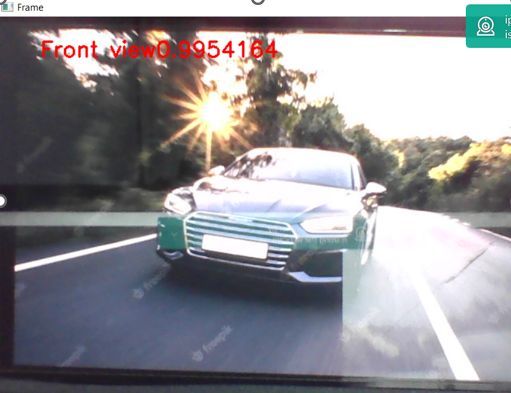

In [42]:
display.Image(r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Results\Front_View.png")

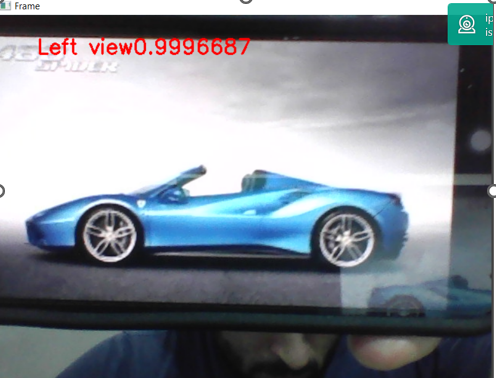

In [43]:
display.Image(r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Results\Left_View.png")

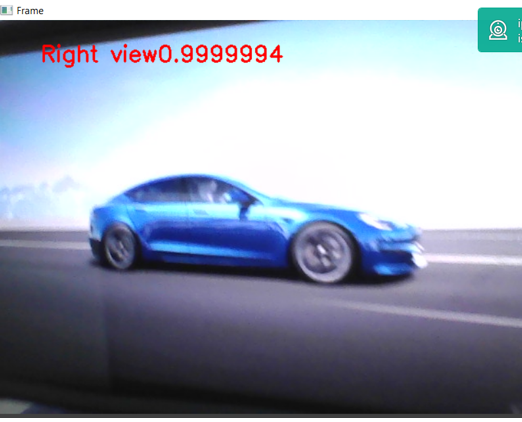

In [44]:
display.Image(r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Results\Right_View.png")

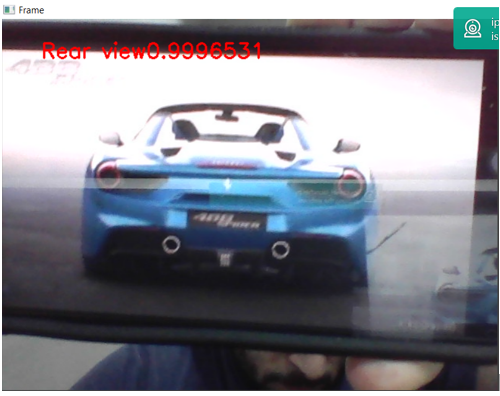

In [45]:
display.Image(r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Results\Rear_View.png")

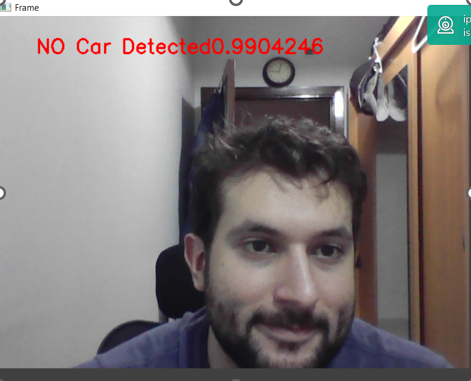

In [46]:
display.Image(r"C:\Users\ASUS\Desktop\Data_Science_Nanodegree_Capstone_Project\Results\No_Car_Detected.png")

## VI. Conclusion
### Reflection

**Throughout this notebook we build a computer vision model step by step from scratch. Here's the steps we followed:**

**1- We collected data from various sources as listed in the beginning of this notebook.**

**2- We split our data into training, validation, and testing data.**

**3- We performed analysis on this data and saw that we needed to increase its size.**

**4- We performed data augmentation using the imgaug library to increase the data size we have and to make our model generalize better.**

**5- We built our model from scratch and identified all the hyperparameters and callbacks we needed.**

**6- We evaluated and tested out model on the test data and analyzed teh results we obtained.**

**7- We tested our model using our webcam in random images from google to further test and make sure our model perform good in real life.**

### Improvement

**To improve our model we can do the following:**

**1- change the architecture of the model or use a pretrained CNN.**

**2- Collect more data and perform data augmentation o the new data to use it in training.**

**3- Better tune the hyperparameters of the model.**